In [1]:
import pandas as pd
import os
import re


class OpenData(object):

    def __init__(self, path) -> None:
        self.path = path

    def check_filename_format(self, filename):
        # Регулярное выражение для проверки формата
        pattern = re.compile(r'^[A-Za-z0-9]+_[A-Za-z0-9.]+_\d{2}\.\d{2}\.\d{4}\.xlsx$')

        # Проверка соответствия формату
        if pattern.match(filename):
            return True
        else:
            return False

    def readFiles(self):
        files = {}
        for file in os.listdir(self.path):
            if "xlsx" in file:
                files[file] = self.path+'\\'+file

        return files

In [2]:
data = pd.read_excel("C:\\Users\\Professional\\Documents\\Disser\\Graphics\\summary_data_sveta.xlsx")
data

,file,serum,virus,midpoint,midpoint_bound_type,slope,r2,rmsd
0,BsAb_BA.1_14.05.2024.xlsx,7-57-Fc,BA.1,12.750367,interpolated,1.802542,0.984703,3.945571
1,BsAb_BA.1_14.05.2024.xlsx,7-58-Fc,BA.1,94.029430,interpolated,0.911652,0.973204,5.808786
2,BsAb_BA.1_14.05.2024.xlsx,57-58-Fc,BA.1,12.017684,interpolated,1.855565,0.979084,4.557772
3,BsAb_BA.1_14.05.2024.xlsx,21-57-Fc,BA.1,26.458685,interpolated,1.283215,0.921046,9.421750
4,BsAb_BA.1_28.12.2023.xlsx,7-Fc,BA.1,161.378723,interpolated,0.863226,0.958976,6.874679
...,...,...,...,...,...,...,...,...
616,BsAb_XBB_19.07.2024.xlsx,7-35-57-Fc,XBB,62.088814,interpolated,1.315042,0.993183,3.139755
617,BsAb_XBB_19.07.2024.xlsx,58-35-57-Fc,XBB,290.716486,interpolated,1.176912,0.975366,5.783549
618,BsAb_XBB_19.07.2024.xlsx,80-Fc,XBB,90.759694,interpolated,0.885992,0.944996,8.033639
619,BsAb_XBB_19.07.2024.xlsx,7-18-57-Fc,XBB,99.197302,interpolated,1.919790,0.973700,6.630829


In [4]:
prefix = "C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\"
dt = OpenData(path = prefix)
files = dt.readFiles()
files

{'BsAb_BA.1_06.06.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.1_06.06.2024.xlsx',
 'BsAb_BA.1_14.05.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.1_14.05.2024.xlsx',
 'BsAb_BA.1_28.12.2023.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.1_28.12.2023.xlsx',
 'BsAb_BA.2_06.06.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.2_06.06.2024.xlsx',
 'BsAb_BA.2_14.05.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.2_14.05.2024.xlsx',
 'BsAb_BA.2_28.12.2023.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.2_28.12.2023.xlsx',
 'BsAb_BA.45_06.06.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.45_06.06.2024.xlsx',
 'BsAb_BA.45_14.05.2024.xlsx': 'C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\\\BsAb_BA.45_14.05.2024.xlsx',
 'BsAb_BA.45_19.07.2024.xlsx

In [5]:
import pandas as pd
from datetime import datetime

class MergeData(object):

    def __init__(self, files):
        self.file = files

    def openDataFrames(self, files):
        self.dataframes = {}
        for key, value in files.items():
            self.dataframes[key] = pd.read_excel(value)
            self.dataframes[key].columns =  self.dataframes[key].columns.astype(str)

    def parseDataColumns(self):
        for key, value in self.dataframes.items():
            new_cols = {}
            for col in value.columns:
                if '-tetra' in col:
                    new_col = col.replace('tetra', 'Gs')
                    if '-Fc' in col:
                        new_col = new_col.replace('-Fc', '')
                    new_cols[col] = new_col
            if len(new_cols) > 0:
                self.dataframes[key] = value.rename(columns = new_cols)

        for key, value in self.dataframes.items():
            new_cols = {}
            for col in value.columns:
                if '-bis' in col:
                    new_col = col.replace('-bis', '')
                    new_cols[col] = new_col
            if len(new_cols) > 0:
                self.dataframes[key] = value.rename(columns = new_cols)

        for key, value in self.dataframes.items():
            new_cols = {}
            for col in value.columns:
                if 'Gs' not in col:
                    if '58-57' in col:
                        new_col = col.replace('58-57', '57-58')
                        new_cols[col] = new_col
                    if '57-21' in col:
                        new_col = col.replace('57-21', '21-57')
                        new_cols[col] = new_col
                    if '57-7' in col:
                        new_col = col.replace('57-7', '7-57')
                        new_cols[col] = new_col
                    if '21-7' in col:
                        new_col = col.replace('21-7', '7-21')
                        new_cols[col] = new_col
                    if '58-7' in col:
                        new_col = col.replace('58-7', '7-58')
                        new_cols[col] = new_col
                    if '58-21' in col:
                        new_col = col.replace('58-21', '21-58')
                        new_cols[col] = new_col
            if len(new_cols) > 0:
                self.dataframes[key] = value.rename(columns = new_cols)
    
    def parseFileNames(self):
        self.names = {}
        for key in self.dataframes.keys():
            self.names[key] = key.replace('BsAb_', '').replace('mono_', '').replace('homo_', '').replace('_', ' ').replace('.xlsx', '')

    def process_dict(self, data):
        df = pd.DataFrame(columns=['serum', 'date'])

        for key, value in data.items():
            parts = value.split(' ')

            date = parts[-1]

            virus = ' '.join(parts[:-1])

            if ' III' in virus:
                virus = virus.replace(' III', '')

            if ' II' in virus:
                virus = virus.replace(' II', '')

            if ' I' in virus:
                virus = virus.replace(' I', '')

            df.loc[key] = [virus, date]

        return df
    
    def parseMultipleDfs(self, dfs):
        parsedDfs = []
        for name, df in dfs.items():
            for col in df.columns:
                if "." in col:
                    spl_col = col.split(".")[0]
                    df[spl_col] = (df[spl_col] + df[col]) / 2
                    df = df.drop(columns = [col])
            parsedDfs.append(self.parseDf(df, name))

        return pd.concat(parsedDfs, axis=0, ignore_index=True)

    def  parseDf(self, df, name):
        dfs = []
        for col in df.columns:
            if col != 'X':
                dfs.append(self.createDfPerColumn(df[col], col, df['X'], name))

        return pd.concat(dfs, axis=0, ignore_index=True)

    def createDfPerColumn(self, df_col, col_name, x_col, virus):
        return pd.DataFrame(data={
            'virus': [col_name for _ in range(len(df_col))],
            'serum': [virus for _ in range(len(df_col))],
            'replicate': [1 for _ in range(len(df_col))],
            'concentration': x_col.values,
            'fraction infectivity': df_col.values,
        })
    
    def processViruses(self, dataframe, parsedVirusNames):
        dataframe = dataframe.merge(parsedVirusNames, left_on='serum', right_index=True, suffixes=('', '_new'))
        dataframe['serum'] = dataframe['serum_new']
        dataframe.drop(columns=['serum_new'], inplace=True)
        return dataframe
    
    def generate_process_combinations(self, dataframe):
        combinations = []
        for i in range(len(dataframe)):
            combinations.append((dataframe.loc[i, 'serum'], dataframe.loc[i, 'virus']))
        
        self.combinations = list(set(combinations))

    def create_serum_virus_dict(self, dataframe):
        serum_virus_dict = {}
        for _, row in dataframe.iterrows():
            serum = row['serum']
            virus = row['virus']
            if serum not in serum_virus_dict:
                serum_virus_dict[serum] = {}
            serum_virus_dict[serum][virus] = True
        return serum_virus_dict
    
    def normalize_dataframes(self):
        normalized = {}

        for name, df in self.dataframes.items():
            df_norm = df.copy()

            for col in df_norm.columns:
                if col == "X":
                    continue

                col_min = df_norm[col].min(skipna=True)
                col_max = df_norm[col].max(skipna=True)

                # защита от деления на 0 (если все значения одинаковые)
                if col_max != col_min:
                    df_norm[col] = (df_norm[col] - col_min) / (col_max - col_min) * 100
                else:
                    df_norm[col] = 0.0

            normalized[name] = df_norm

        self.dataframes = normalized

    def process_replicates(self, dataframe):
        dct = {}

        for combo in self.combinations:
            if len(set(dataframe[(dataframe['serum'] == combo[0]) & (dataframe['virus'] == combo[1])]['date'].values)) > 1:
                # print([date for date in list(set(dataframe[(dataframe['serum'] == combo[0]) & (dataframe['virus'] == combo[1])]['date'].values))])
                date_objects = [datetime.strptime(date, '%d.%m.%Y') for date in list(set(dataframe[(dataframe['serum'] == combo[0]) & (dataframe['virus'] == combo[1])]['date'].values))]
                sorted_dates = sorted(date_objects)
                numbered_dates = {date.strftime('%d.%m.%Y'): i + 1 for i, date in enumerate(sorted_dates)}
                for key, val in numbered_dates.items():
                    dct[(combo[0], combo[1], key)] = val

        for key, value in dct.items():
            for idx in dataframe[(dataframe['serum'] == key[0]) & (dataframe['virus'] == key[1]) & (dataframe['date'] == key[2])].index:
                dataframe.loc[idx, 'replicate'] = int(value)
    
parsed_dict = {}
for file, path in files.items():
    d = {file: path}
    dt = MergeData(files=d)
    dt.openDataFrames(files=d)
    dt.parseDataColumns()
    dt.parseFileNames()
    new_virus_names = dt.process_dict(data=dt.names)
    # dt.normalize_dataframes()
    merged_data = dt.parseMultipleDfs(dt.dataframes)
    df = dt.processViruses(merged_data, new_virus_names)
    # df["serum"], df["virus"] = df["virus"], df["serum"]
    parsed_dict[file] = df
    # dt.generate_process_combinations(df)
    # dt.process_replicates(df)
    # serum_virus_dict = dt.create_serum_virus_dict(df)

In [6]:
parsed_dict

{'BsAb_BA.1_06.06.2024.xlsx':           virus serum  replicate  concentration  fraction infectivity  \
 0    7-18-57-Fc  BA.1          1     4000.00000             -0.047350   
 1    7-18-57-Fc  BA.1          1     2000.00000             -0.238460   
 2    7-18-57-Fc  BA.1          1     1000.00000             -0.249350   
 3    7-18-57-Fc  BA.1          1      500.00000              0.146388   
 4    7-18-57-Fc  BA.1          1      250.00000             -0.078670   
 5    7-18-57-Fc  BA.1          1      125.00000              2.129499   
 6    7-18-57-Fc  BA.1          1       62.50000              9.714154   
 7    7-18-57-Fc  BA.1          1       31.25000             17.003790   
 8    7-18-57-Fc  BA.1          1       15.62500             26.949620   
 9    7-18-57-Fc  BA.1          1        7.81250             48.587570   
 10   7-18-57-Fc  BA.1          1        3.90625             70.341000   
 11  58-18-57-Fc  BA.1          1     4000.00000              0.580232   
 12  58-1

In [7]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import io
from matplotlib.lines import Line2D
import neutcurve

# ===========================================================
# Настраиваемые параметры для рисования
# ===========================================================
DEFAULT_PLOT_KW = dict(
    xlabel="",
    ylabel="",
    ncol=3,
    markersize=20,
    linewidth=5,
    legendtitle="",
    attempt_shared_legend=True,
    legendfontsize=25,
    titlesize=45,
    labelsize=35,
    ticksize=30,
    widthscale=3,
    heightscale=3,
    sharex=True,
    sharey=False,
    # fix_lims={'ymin': -5, 'ymax': 120, "xmax": 1e5},
    # fix_lims={'ymin': -5, 'ymax': 120},
)

# ===========================================================
# Форматирование fit-параметров в текстовые блоки
# ===========================================================
def format_fit_blocks_with_color_and_marker(fit_params, virus_map):
    """
    Создаёт список кортежей для блоков:
    (текст, R²-цвет, marker-цвет для вируса)
    """
    blocks = []
    for _, row in fit_params.iterrows():
        text = (
            f"{row['serum']} | {row['virus']}\n"
            f"midpoint = {row['midpoint']:.2f}\n"
            f"ic50 = {row['ic50']:.2f}\n"
            f"slope = {row['slope']:.2f}\n"
            f"R² = {row['r2']:.3f}\n"
            f"RMSD = {row['rmsd']:.2f}"
        )
        r2_color = get_r2_color(row['r2'])
        virus_color, virus_marker = virus_map.get(row['virus'], ("gray", "o"))  # если вируса нет, серый маркер
        blocks.append((text, r2_color, virus_color, virus_marker))
    return blocks

def get_r2_color(r2):
    if r2 > 0.95:
        return "#b3f0b3"  # светло-зелёный
    elif r2 > 0.9:
        return "#d0f0a0"  # салатовый
    elif r2 > 0.8:
        return "#ffffb3"  # светло-жёлтый
    elif r2 > 0.7:
        return "#ffff80"  # жёлтый
    elif r2 > 0.6:
        return "#ffcc80"  # оранжевый
    else:
        return "#ff9999"  # красный

def combine_global_individual_figures(df_global, df_ind, key_name, plot_kw=None, outpath=None):
    figs = []

    # ------------------ Global ------------------
    if df_global is None or df_global.empty:
        fig_global = plt.figure()
        ax = fig_global.add_subplot(111)
        ax.text(0.5, 0.5, "global_plateau (no valid data)", ha="center", va="center", fontsize=20)
        ax.axis("off")
    else:
        df_copy = df_global.copy()
        df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]
        fits = neutcurve.CurveFits(df_copy.dropna(), fracinf_col="fraction infectivity_norm",
                                   fixbottom=0, fixtop=1, fixslope=(0.5,5), fix_slope_first=True, allow_reps_unequal_conc=True)
        virus_map = generate_virus_color_marker_map_from_df(df_copy)
        fig_global, ax_global = fits.plotSera(virus_to_color_marker=virus_map, max_viruses_per_subplot=50, **(plot_kw or {}))
        fig_global.suptitle("global_plateau", fontsize=25)
    figs.append(fig_global)

    # ------------------ Individual ------------------
    if df_ind is None or df_ind.empty:
        fig_ind = plt.figure()
        ax = fig_ind.add_subplot(111)
        ax.text(0.5, 0.5, "individual_plateau (no valid data)", ha="center", va="center", fontsize=20)
        ax.axis("off")
    else:
        df_copy = df_ind.copy()
        df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]
        fits = neutcurve.CurveFits(df_copy.dropna(), fracinf_col="fraction infectivity_norm",
                                   fixbottom=0, fixtop=1, fixslope=(0.5,5), fix_slope_first=True, allow_reps_unequal_conc=True)
        virus_map = generate_virus_color_marker_map_from_df(df_copy)
        fig_ind, ax_ind = fits.plotSera(virus_to_color_marker=virus_map, max_viruses_per_subplot=50, **(plot_kw or {}))
        fig_ind.suptitle("individual_plateau", fontsize=25)
    figs.append(fig_ind)

    # ------------------ Combine both figures ------------------
    images = []
    for f in figs:
        buf = io.BytesIO()
        f.savefig(buf, format='png', dpi=300, bbox_inches='tight')
        buf.seek(0)
        img = Image.open(buf)
        images.append(img)
        plt.close(f)

    # высота = сумма, ширина = максимум
    widths = [im.width for im in images]
    heights = [im.height for im in images]
    combined_img = Image.new('RGB', (max(widths), sum(heights)), (255,255,255))
    y_offset = 0
    for im in images:
        combined_img.paste(im, (0, y_offset))
        y_offset += im.height

    if outpath:
        combined_img.save(outpath)
        print(f"Saved combined figure: {outpath}")

    return combined_img
    
def plot_neutcurve_on_subfig(
    df,
    subfig,
    title,
    plot_kw=None,
):
    if df is None or df.empty:
        ax = subfig.add_subplot(111)
        ax.axis("off")
        ax.set_title(f"{title} (no valid data)", fontsize=20)
        return

    if plot_kw is None:
        plot_kw = DEFAULT_PLOT_KW.copy()

    df_copy = df.copy()
    df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]

    fits = neutcurve.CurveFits(
        df_copy.dropna(),
        fracinf_col="fraction infectivity_norm",
        fixbottom=0,
        fixtop=1,
        fixslope=(0.5, 5),
        fix_slope_first=True,
        allow_reps_unequal_conc=True,
    )

    virus_map = generate_virus_color_marker_map_from_df(df_copy)

    fig_tmp, axs_tmp = fits.plotSera(
        virus_to_color_marker=virus_map,
        max_viruses_per_subplot=50,
        **plot_kw
    )

    # переносим оси в subfigure
    for ax in np.atleast_1d(axs_tmp).flatten():
        subfig._axstack.add(ax)

    plt.close(fig_tmp)

    subfig.suptitle(title, fontsize=25)

    
def plot_neutcurve_on_ax(
    df,
    ax,
    title,
    plot_kw=None,
):
    if df is None or df.empty:
        ax.axis("off")
        ax.set_title(f"{title} (no valid data)", fontsize=20)
        return

    if plot_kw is None:
        plot_kw = DEFAULT_PLOT_KW.copy()

    df_copy = df.copy()
    df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]

    fits = neutcurve.CurveFits(
        df_copy.dropna(),
        fracinf_col="fraction infectivity_norm",
        fixbottom=0,
        fixtop=1,
        fixslope=(0.5, 5),
        fix_slope_first=True,
        allow_reps_unequal_conc=True,
    )

    virus_map = generate_virus_color_marker_map_from_df(df_copy)

    fits.plotSera(
        virus_to_color_marker=virus_map,
        axes=[ax],                     # 🔥 КЛЮЧЕВОЕ МЕСТО
        max_viruses_per_subplot=50,
        **plot_kw
    )

    ax.set_title(title, fontsize=25)

def process_parsed_dicts_global_vs_individual(
    parsed_dict_global,
    parsed_dict_individual,
    outdir,
    save=True,
    plot_kw=None,
):
    os.makedirs(outdir, exist_ok=True)

    all_keys = sorted(
        set(parsed_dict_global.keys()) |
        set(parsed_dict_individual.keys())
    )

    figs = {}

    for key in all_keys:
        print(f"Processing {key} ...")

        df_global = parsed_dict_global.get(key)
        df_ind = parsed_dict_individual.get(key)

        # если оба пустые — полностью пропускаем
        if (
            (df_global is None or df_global.empty) and
            (df_ind is None or df_ind.empty)
        ):
            print(f"  skipped (both empty)")
            continue

        fig, axs = plt.subplots(
            2, 1,
            figsize=(16, 18),
            sharex=True
        )

        plot_neutcurve_on_ax(
            df=df_global,
            ax=axs[0],
            title="global_plateau",
            plot_kw=plot_kw,
        )

        plot_neutcurve_on_ax(
            df=df_ind,
            ax=axs[1],
            title="individual_plateau",
            plot_kw=plot_kw,
        )

        fig.suptitle(key, fontsize=30, y=0.98)
        fig.tight_layout(rect=[0, 0, 1, 0.96])

        if save:
            fname = os.path.splitext(key)[0] + "_global_vs_individual.png"
            fullpath = os.path.join(outdir, fname)
            fig.savefig(fullpath, dpi=300, bbox_inches="tight")
            plt.close(fig)
            print(f"  saved: {fullpath}")

        figs[key] = fig

    return figs

# ===========================================================
# Размещение блоков в 2 колонки справа на фигуре
# ===========================================================
def add_fit_blocks_to_fig_with_marker_line(
    fig,
    blocks,  # список (текст, r2_color, virus_color, virus_marker)
    ncols=2,
    x_start=0.60,
    x_gap=0.18,
    y_start=0.9,
    y_step=0.15,
    fontsize=12,
    default_bbox_kwargs=None,
    marker_line_length=0.015  # длина линии в 2 раза меньше
):
    if default_bbox_kwargs is None:
        default_bbox_kwargs = dict(boxstyle="round", alpha=0.9, pad=0.2)

    n = len(blocks)
    if n == 0:
        return

    rows = math.ceil(n / ncols)

    cols = []
    for c in range(ncols):
        start = c * rows
        end = start + rows
        cols.append(blocks[start:end])

    for col_idx, col_blocks in enumerate(cols):
        x = x_start + col_idx * x_gap
        for row_idx, (text, r2_color, virus_color, virus_marker) in enumerate(col_blocks):
            y = y_start - row_idx * y_step
            bbox_kwargs = default_bbox_kwargs.copy()
            bbox_kwargs['facecolor'] = r2_color  # фон по R²

            # ----------------- 1) Рисуем фон и текст -----------------
            fig.text(
                x, y,
                text,
                ha="left",
                va="top",
                fontsize=fontsize,
                bbox=bbox_kwargs
            )

            # ----------------- 2) Добавляем маркер с маленькой линией -----------------
            # положение линии слева от блока
            line_x_start = x - 0.02
            line_x_end = line_x_start + marker_line_length  # теперь линия в 2 раза короче

            # маркер по середине линии
            marker_x = (line_x_start + line_x_end) / 2

            # приблизительно по центру блока по Y
            block_height = fontsize * 0.002
            marker_y = y - block_height / 2

            # рисуем линию
            fig.add_artist(Line2D(
                [line_x_start, line_x_end],
                [marker_y, marker_y],
                color=virus_color,
                linewidth=2
            ))

            # рисуем маркер на середине линии
            fig.add_artist(Line2D(
                [marker_x], [marker_y],
                marker=virus_marker,
                color=virus_color,
                markersize=fontsize * 0.7,
                linestyle="None"
            ))

def generate_virus_color_marker_map_from_df(df):
    """
    Создаёт словарь virus -> (color, marker) только для вирусов, реально
    присутствующих в данном DataFrame.
    """
    viruses = sorted(df['virus'].unique())
    colors = plt.cm.tab20.colors
    markers = ['o', 's', '^', 'D', 'v', 'P', '*', 'X', 'h', '+']
    
    virus_to_color_marker = {}
    for i, virus in enumerate(viruses):
        color = colors[i % len(colors)]
        marker = markers[i % len(markers)]
        virus_to_color_marker[virus] = (color, marker)
    
    return virus_to_color_marker

# ===========================================================
# Построение графика для одного DataFrame
# ===========================================================
def plot_neutcurve_for_df(
    df,
    key_name,
    outdir=None,
    save=False,
    plot_kw=None,
    fit_text_kw=None,
    curvefit_kwargs=None,
    fitparams_kwargs=None
):
    if plot_kw is None:
        plot_kw = DEFAULT_PLOT_KW.copy()
    if curvefit_kwargs is None:
        curvefit_kwargs = dict(fix_slope_first=False, allow_reps_unequal_conc=True, fixbottom=0, fixtop=100)
    if fitparams_kwargs is None:
        fitparams_kwargs = dict(average_only=True, no_average=False, ic50_error="fit_stdev")
    if fit_text_kw is None:
        fit_text_kw = dict(
            ncols=2,
            x_start=0.7,
            x_gap=0.13,
            y_start=0.9,
            y_step=0.15,
            fontsize=12,
            default_bbox_kwargs=dict(boxstyle="round", alpha=0.9, pad=0.2)
        )

    # print(fit_text_kw)

    df_copy = df.copy()
    df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]

    # ----------------- 1) Получение fit_params -----------------
    fits = neutcurve.CurveFits(
        df_copy.dropna(),
        fracinf_col="fraction infectivity_norm",
        fixbottom=0,
        fixtop=1,
        fixslope=(0.5, 5),
        fix_slope_first=True,
        allow_reps_unequal_conc=True,
    )
    fit_params = fits.fitParams(average_only=True, no_average=False, ic50_error="fit_stdev")

    virus_map = generate_virus_color_marker_map_from_df(df_copy)
    # print(fit_params)
    fig, axs = fits.plotSera(virus_to_color_marker=virus_map, max_viruses_per_subplot=20, **plot_kw)
    fig.set_size_inches(16, 9)

    # ----------------- 3) Построение кривых -----------------
    # fig = plt.figure(figsize=(32, 22))
    # fig, axs = fits_module.plotSera(virus_to_color_marker=virus_map, **plot_kw)

    # ----------------- 4) Скрываем заголовки субплотов и общий заголовок -----------------
    for ax in np.atleast_1d(axs).flatten():
        ax.set_title("")

    fig.suptitle(
        key_name,
        fontsize=30,
        y=0.98
    )

    # ----------------- 5) Добавление блоков fit-параметров -----------------
    blocks = format_fit_blocks_with_color_and_marker(fit_params, virus_map)
    add_fit_blocks_to_fig_with_marker_line(fig, blocks, **fit_text_kw)

    # ----------------- 6) Сохранение -----------------
    if save:
        if outdir is None:
            raise ValueError("outdir не задан, но save=True.")
        os.makedirs(outdir, exist_ok=True)
        base = os.path.splitext(key_name)[0]
        fname = base + ".png"
        fullpath = os.path.join(outdir, fname)
        fig.savefig(fullpath, dpi=300, bbox_inches="tight")
        plt.close(fig)
        print(f"Saved: {fullpath}")

    return

def plot_neutcurve_for_two_dicts_with_blocks(
    parsed_dict_global,
    parsed_dict_individual,
    outdir=None,
    save=False,
    plot_kw=None,
    fit_text_kw=None,
):
    """
    Построение для двух словарей (global и individual) в одной картинке.
    Каждый плот получает модифицированное название (_global / _individual), блоки fit-параметров остаются.
    """
    import io
    from PIL import Image

    keys = sorted(set(parsed_dict_global.keys()) | set(parsed_dict_individual.keys()))

    for key in keys:
        # print(key)
        figs = []

        # ------------------ Global ------------------
        df_global = parsed_dict_global.get(key)
        if len(df_global.dropna()) == 0:
            continue
        
        df_ind = parsed_dict_individual.get(key)
        if len(df_ind.dropna()) == 0:
            continue
        
        if df_global is None or df_global.empty:
            fig_global, ax = plt.subplots(figsize=(16, 9))
            ax.text(0.5, 0.5, "global_plateau (no valid data)", ha="center", va="center", fontsize=20)
            ax.axis("off")
        else:
            df_copy = df_global.copy().dropna()
            df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]
            # print(df_copy)

            fits = neutcurve.CurveFits(
                df_copy,
                fracinf_col="fraction infectivity_norm",
                fixbottom=0,
                fixtop=1,
                fixslope=(0.5,5),
                fix_slope_first=True,
                allow_reps_unequal_conc=True,
            )
            fit_params = fits.fitParams(average_only=True, no_average=False, ic50_error="fit_stdev")
            virus_map = generate_virus_color_marker_map_from_df(df_copy)

            fig_global, axs_global = fits.plotSera(
                virus_to_color_marker=virus_map,
                max_viruses_per_subplot=20,
                **(plot_kw or {})
            )
            axs_flat = np.atleast_1d(axs_global).flatten()

            # Для каждой оси поменяем title
            for ax in axs_flat:
                old_title = ax.get_title()
                ax.set_title(f"{old_title}_global", fontsize=16)  # или "_individual" для другого случая
            fig_global.set_size_inches(16, 9)

            # Добавляем блоки fit-параметров
            blocks = format_fit_blocks_with_color_and_marker(fit_params, virus_map)
            add_fit_blocks_to_fig_with_marker_line(fig_global, blocks, **(fit_text_kw or {}))

        figs.append(fig_global)

        # ------------------ Individual ------------------
        if df_ind is None or df_ind.empty:
            fig_ind, ax = plt.subplots(figsize=(16, 9))
            ax.text(0.5, 0.5, "individual_plateau (no valid data)", ha="center", va="center", fontsize=20)
            ax.axis("off")
        else:
            df_copy = df_ind.copy().dropna()
            df_copy["serum"], df_copy["virus"] = df_copy["virus"], df_copy["serum"]
            # print(df_copy)

            fits = neutcurve.CurveFits(
                df_copy,
                fracinf_col="fraction infectivity_norm",
                fixbottom=0,
                fixtop=1,
                fixslope=(0.5,5),
                fix_slope_first=True,
                allow_reps_unequal_conc=True,
            )
            fit_params = fits.fitParams(average_only=True, no_average=False, ic50_error="fit_stdev")
            virus_map = generate_virus_color_marker_map_from_df(df_copy.dropna())
            # print(fit_params)

            fig_ind, axs_ind = fits.plotSera(
                virus_to_color_marker=virus_map,
                max_viruses_per_subplot=20,
                **(plot_kw or {})
            )

            axs_flat = np.atleast_1d(axs_ind).flatten()

            # Для каждой оси поменяем title
            for ax in axs_flat:
                old_title = ax.get_title()
                ax.set_title(f"{old_title}_individual", fontsize=16)  # или "_individual" для другого случая

            fig_ind.set_size_inches(16, 9)

            # Добавляем блоки fit-параметров
            blocks = format_fit_blocks_with_color_and_marker(fit_params, virus_map)
            add_fit_blocks_to_fig_with_marker_line(fig_ind, blocks, **(fit_text_kw or {}))

        figs.append(fig_ind)

        # ------------------ Объединяем картинки через PIL ------------------
        images = []
        for f in figs:
            buf = io.BytesIO()
            f.savefig(buf, format='png', dpi=300, bbox_inches='tight')
            buf.seek(0)
            img = Image.open(buf)
            images.append(img)
            plt.close(f)

        widths = [im.width for im in images]
        heights = [im.height for im in images]
        combined_img = Image.new('RGB', (max(widths), sum(heights)), (255,255,255))
        y_offset = 0
        for im in images:
            combined_img.paste(im, (0, y_offset))
            y_offset += im.height

        # ------------------ Сохранение ------------------
        if save and outdir is not None:
            os.makedirs(outdir, exist_ok=True)
            fname = f"{key}_combined.png"
            fullpath = os.path.join(outdir, fname)
            combined_img.save(fullpath)
            print(f"Saved combined figure with blocks: {fullpath}")


def calc_neutcurve_for_df(
    df,
    key_name,
):
    fits = neutcurve.CurveFits(
        df.dropna(),
        fracinf_col="fraction infectivity_norm",
        fixbottom=0,
        fixtop=1,
        fixslope=(0.5, 5),
        fix_slope_first=True,
        allow_reps_unequal_conc=True,
    )

    fit_params = fits.fitParams(
        average_only=True,
        no_average=False,
        ic50_error=None   # 🔥 обязательно
    )

    fit_params["file"] = key_name
    return fit_params

# ===========================================================
# Конвейер для всего parsed_dict
# ===========================================================
def process_parsed_dict(
    parsed_dict,
):
    # figs = {}
    fits = {}
    for key, df in parsed_dict.items():
        print(f"Processing {key} ...")
        fit_params = calc_neutcurve_for_df(
            df=df,
            key_name=key,
        )
        fits[key] = fit_params
    return fits


In [8]:
import numpy as np
import pandas as pd
from typing import Dict, Tuple, Any, Optional, List

class PlateauNormalizer:
    def __init__(
        self,
        serum_col: str,
        conc_col: str,
        val_col: str,
        use_minmax_scaler: bool = True,
        use_plateau_snap: bool = True,
        plateau_eps: float = 0.02,
        clip: bool = True,
    ):
        self.serum_col = serum_col
        self.conc_col = conc_col
        self.val_col = val_col
        self.use_minmax_scaler = use_minmax_scaler
        self.use_plateau_snap = use_plateau_snap
        self.plateau_eps = plateau_eps
        self.clip = clip

    # ✅ ВОТ ОН, ВНУТРИ КЛАССА
    def _snap_to_plateau(self, norm_values: np.ndarray) -> np.ndarray:
        eps = self.plateau_eps
        norm_values = norm_values.copy()

        # --- верхнее плато ---
        high = norm_values >= (1 - eps)
        if high.any():
            first_high = np.argmax(high)
            norm_values[first_high:] = 1.0

        # --- нижнее плато (консервативно) ---
        low = norm_values <= eps
        if low.any():
            first_low = np.argmax(low)
            tail = norm_values[first_low:]
            if np.all(np.diff(tail) <= eps):
                norm_values[:first_low + 1] = 0.0

        return norm_values

    # --------------------
    # Helper functions (unchanged)
    # --------------------
    def _tol(self, median_val: float) -> float:
        return max(self.abs_tol, abs(median_val) * self.rel_tol)
    
    def _serum_trend_ok(self, concs: np.ndarray, vals: np.ndarray) -> bool:
        try:
            concs = np.asarray(concs, dtype=float)
            vals = np.asarray(vals, dtype=float)
        except Exception:
            return True

        n = len(vals)
        if n < 3:
            return True

        order = np.argsort(concs)[::-1]
        v_sorted = vals[order]

        diffs = np.diff(v_sorted)
        n_steps = len(diffs)
        if n_steps == 0:
            return True

        n_increases = np.sum(diffs > 0)
        frac_increase = float(n_increases) / float(n_steps)

        return frac_increase >= float(self.min_frac_increasing)

    def _find_plateau_from_edge(self, arr: np.ndarray, from_start: bool = True) -> Optional[Dict[str, Any]]:
        if not from_start:
            arr = arr[::-1]

        n = len(arr)
        if n < self.min_plateau_len:
            return None

        window_idx = list(range(self.min_plateau_len))
        window_vals = arr[window_idx]
        if np.all(np.isnan(window_vals)):
            return None
        med = float(np.nanmedian(window_vals))
        mad = float(np.nanmedian(np.abs(window_vals - med))) if np.any(~np.isnan(window_vals)) else 0.0

        outlier_count = 0
        for i in range(self.min_plateau_len, n):
            v = arr[i]
            if np.isnan(v):
                break
            if abs(v - med) <= self._tol(med):
                window_idx.append(i)
                vals = arr[window_idx]
                med = float(np.nanmedian(vals))
                mad = float(np.nanmedian(np.abs(vals - med)))
            else:
                outlier_count += 1
                if outlier_count <= self.allow_outliers:
                    window_idx.append(i)
                    vals = arr[window_idx]
                    med = float(np.nanmedian(vals))
                    mad = float(np.nanmedian(np.abs(vals - med)))
                else:
                    break

        if len(window_idx) < self.min_plateau_len:
            return None

        if from_start:
            indices = window_idx
        else:
            indices = [n - 1 - idx for idx in window_idx[::-1]]

        plateau_vals = arr[window_idx]
        if np.all(np.isnan(plateau_vals)):
            return None
        final_med = float(np.nanmedian(plateau_vals))
        final_mad = float(np.nanmedian(np.abs(plateau_vals - final_med))) if np.any(~np.isnan(plateau_vals)) else 0.0

        return {'indices': indices, 'median': final_med, 'mad': final_mad, 'length': len(indices)}
    
    def _passes_min_infectivity_qc(self, df: pd.DataFrame, threshold: float = 50.0) -> bool:
        if df.empty:
            return False

        tmp = df.dropna(subset=[self.serum_col, self.val_col])
        if tmp.empty:
            return False

        max_per_serum = (
            tmp
            .groupby(self.serum_col)[self.val_col]
            .max()
        )

        if max_per_serum.empty:
            return False

        return not (max_per_serum < threshold).all()

    def _get_plateau_or_fallback(self, vals: np.ndarray, from_start: bool):
        strict = self._find_plateau_from_edge(vals, from_start=from_start)
        if strict is not None:
            return strict | {'source': 'strict'}

        if len(vals) >= 2:
            pts = vals[:2] if from_start else vals[-2:]
            return {
                'median': float(np.nanmean(pts)),
                'length': 2,
                'source': 'fallback_2'
            }

        if len(vals) == 1:
            return {
                'median': float(vals[0]),
                'length': 1,
                'source': 'fallback_1'
            }

        return None

    @staticmethod
    def _weighted_median(values: List[float], weights: List[float]) -> Optional[float]:
        values = np.asarray(values)
        weights = np.asarray(weights, dtype=float)
        if len(values) == 0:
            return None
        order = np.argsort(values)
        v_sorted = values[order]
        w_sorted = weights[order]
        cumw = np.cumsum(w_sorted)
        cutoff = cumw[-1] / 2.0
        idx = np.searchsorted(cumw, cutoff)
        return float(v_sorted[min(idx, len(v_sorted) - 1)])

    # --------------------
    # Snapping function (unchanged)
    # --------------------
    # def snap_to_plateau(norm_values, eps=0.02):
    #     norm_values = norm_values.copy()

    #     # --- верхнее плато ---
    #     high = norm_values >= (1 - eps)
    #     if high.any():
    #         first_high = np.argmax(high)
    #         norm_values[first_high:] = 1.0

    #     # --- нижнее плато (опционально, консервативно) ---
    #     low = norm_values <= eps
    #     if low.any():
    #         first_low = np.argmax(low)
    #         tail = norm_values[first_low:]
    #         if np.all(np.diff(tail) <= eps):
    #             norm_values[:first_low + 1] = 0.0

    #     return norm_values

    # --------------------
    # New: MinMax scaler helper
    # --------------------
    def _minmax_scale_series(self, s: pd.Series) -> Tuple[pd.Series, float, float]:
        """
        Масштабирует Series в [0,1] по правилу (x - min)/(max-min).
        Если max == min -> возвращается Series заполненный NaN (не можем масштабировать),
        но можно также вернуть 0.0; здесь возвращаю NaN, чтобы сигнализировать, что
        группа непригодна для нормализации.
        Возвращает (scaled_series, min_val, max_val)
        """
        s_float = s.astype(float)
        valid = s_float.dropna()
        if valid.empty:
            return pd.Series(np.nan, index=s.index), np.nan, np.nan
        vmin = float(np.nanmin(valid))
        vmax = float(np.nanmax(valid))
        if np.isclose(vmax, vmin):
            # Нельзя масштабировать — все значения одинаковы
            return pd.Series(np.nan, index=s.index), vmin, vmax
        scaled = (s_float - vmin) / (vmax - vmin)
        if self.clip:
            scaled = scaled.clip(0.0, 1.0)
        return scaled, vmin, vmax

    # --------------------
    # Processing methods (modified to support use_minmax_scaler)
    # --------------------
    def process_dataframe_global(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, Any]]:
        df = df.copy()
        df = df.dropna(subset=[self.conc_col, self.val_col]).copy()
        df[self.conc_col] = pd.to_numeric(df[self.conc_col], errors='coerce')
        df[self.val_col] = pd.to_numeric(df[self.val_col], errors='coerce')

        # if self.swap_serum_virus:
        #     df[self.serum_col], df["virus"] = df.get("virus"), df.get(self.serum_col)

        norm_col = f"{self.val_col}_norm"
        snapped_col = f"{self.val_col}_snapped"

        # Если включен minmax scaler — масштабируем весь датафрейм простым min/max
        if self.use_minmax_scaler:
            s_all = df[self.val_col].astype(float)
            scaled, vmin, vmax = self._minmax_scale_series(s_all)
            df[snapped_col] = df[self.val_col].astype(float)  # не изменяем исходные значения
            df[norm_col] = scaled

            # report
            report_df = pd.DataFrame({
                'metric': ['global_min', 'global_max'],
                'value': [vmin, vmax]
            })
            plateaus_info = {
                'chosen_lower': vmin,
                'chosen_upper': vmax,
                'mode': 'minmax_global'
            }
            return df, report_df, plateaus_info

        # ---- legacy plateau-based path (как было раньше) ----
        values = df[self.val_col].dropna()
        chosen_lower = float(np.nanpercentile(values, self.fallback_lower_pct))
        chosen_upper = float(np.nanmax(values))
        if np.isclose(chosen_upper, chosen_lower):
            chosen_lower = float(np.nanmin(values))
            chosen_upper = float(np.nanmax(values))

        s = df[self.val_col].astype(float)
        s = self._snap_to_plateau(plateau_type="global", series=s, plateau_value=chosen_lower)
        s = self._snap_to_plateau(plateau_type="global", series=s, plateau_value=chosen_upper)
        df[snapped_col] = s

        denom = chosen_upper - chosen_lower
        if denom == 0:
            denom = 1.0

        df[norm_col] = (s - chosen_lower) / denom
        if self.clip:
            df[norm_col] = df[norm_col].clip(0.0, 1.0)

        report_df = pd.DataFrame({
            'metric': ['lower', 'upper'],
            'value': [chosen_lower, chosen_upper]
        })
        plateaus_info = {
            'chosen_lower': chosen_lower,
            'chosen_upper': chosen_upper,
            'mode': 'legacy_global'
        }
        return df, report_df, plateaus_info


    def process_dataframe_individual(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, pd.DataFrame, Dict[str, Any]]:
        df = df.copy()
        print(df)
        # обратный swap (вы у себя ставили serum<->virus до этой функции; в примере реплейс оставил)
        # df["serum"], df["virus"] = df["virus"], df["serum"]
        records = []
        df = df.dropna(subset=[self.conc_col, self.val_col]).copy()
        df[self.conc_col] = pd.to_numeric(df[self.conc_col], errors='coerce')
        df[self.val_col] = pd.to_numeric(df[self.val_col], errors='coerce')

        # if self.swap_serum_virus:
        #     df[self.serum_col], df["virus"] = df.get("virus"), df.get(self.serum_col)

        norm_col = f"{self.val_col}_norm"
        snapped_col = f"{self.val_col}_snapped"
        df[norm_col] = np.nan
        df[snapped_col] = df[self.val_col].astype(float)

        # Ветвление: либо используем minmax scaler, либо плато-алгоритм
        if self.use_minmax_scaler:
            for serum, group in df.groupby(self.serum_col):
                idx = group.index
                values = group[self.val_col].astype(float)

                vmin = values.min()
                vmax = values.max()

                if pd.isna(vmin) or pd.isna(vmax) or np.isclose(vmin, vmax):
                    df.loc[idx, norm_col] = np.nan
                    continue

                norm_values = (values - vmin) / (vmax - vmin)

                if self.use_plateau_snap:
                    norm_values = self._snap_to_plateau(norm_values.values)

                df.loc[idx, norm_col] = norm_values
                df.loc[idx, snapped_col] = values.values


            report_df = (
                df
                .groupby(self.serum_col)[self.val_col]
                .agg(['min', 'max', 'count'])
                .reset_index()
                .rename(columns={self.serum_col: 'serum_id'})
            )

            plateaus_info = {
                'n_serums_total': report_df.shape[0],
                'n_serums_used_for_norm': int((report_df['max'] > report_df['min']).sum()),
                'mode': 'minmax_individual + plateau_snap',
                'plateau_eps': self.plateau_eps
            }

            return df, report_df, plateaus_info

    # --------------------
    # Public runner (unchanged)
    # --------------------
    def run_on_parsed_dict(self, parsed_dict: Dict[str, pd.DataFrame], variant: str = 'global') -> Tuple[Dict[str, pd.DataFrame], Dict[str, Any]]:
        assert variant in ('global', 'individual'), "variant must be 'global' or 'individual'"
        processed = {}
        reports = {}

        for key, df_leg in parsed_dict.items():
            print(f"Processing {key} ...")
            df = df_leg.copy()
            df["serum"], df["virus"] = df["virus"], df["serum"]

            if not self._passes_min_infectivity_qc(df, threshold=50.0):
                print("  QC failed: no serum reaches 50% infectivity -> skip entire DataFrame.\n")
                continue

            try:
                if variant == 'global':
                    df_norm, report_df, plateaus_info = self.process_dataframe_global(df)
                else:
                    df_norm, report_df, plateaus_info = self.process_dataframe_individual(df)

                if (variant == 'individual') and df_norm.empty:
                    print("  No valid serums left after filtering -> skip entire DataFrame.\n")
                    continue

                processed[key] = df_norm
                reports[key] = {
                    'report_df': report_df,
                    'plateaus_info': plateaus_info
                }

                if variant == 'global':
                    if 'chosen_lower' in plateaus_info:
                        print(
                            f"  Global lower: {plateaus_info['chosen_lower']:.3f}, upper: {plateaus_info['chosen_upper']:.3f}\n"
                        )
                    else:
                        print("  Global normalization done.\n")
                else:
                    print(f"  Serums total: {plateaus_info.get('n_serums_total', 0)}, used for norm: {plateaus_info.get('n_serums_used_for_norm', 0)}\n")

            except Exception as e:
                print(f"  ERROR processing {key}: {e}\n")
                continue

        return processed, reports



# --------------------
# Пример использования:
# --------------------
if __name__ == "__main__":
    # parsed_dict — ваш словарь filename -> DataFrame
    # допустим parsed_dict уже есть в окружении
    # parsed_dict = {'file1.xlsx': df1, 'file2.xlsx': df2, ...}

    # настройте нормализатор:
    normalizer = PlateauNormalizer(
        serum_col='serum',
        conc_col='concentration',
        val_col='fraction infectivity',
        # min_plateau_len=3,
        # abs_tol=5.0,
        # rel_tol=0.15,
        # allow_outliers=1,
        # fallback_lower_pct=5,
        # fallback_upper_pct=95,
        # clip=True,
        # plateau_snap_pct_global=15.0,   # <-- snap threshold в процентах (15%)
        # plateau_snap_pct_ind=5.0,   # <-- snap threshold в процентах (5%)
        # plateau_snap_abs=None,  # <-- если задать число, будет использоваться абсолютный порог
        # swap_serum_virus=False,  # <-- если ваш исходный код требовал переименования серумов/вирусов
        use_minmax_scaler=True,
    )

    # Запустить в global-режиме:
    parsed_dict_norm_global, reports_global = normalizer.run_on_parsed_dict(parsed_dict, variant='global')

    # Или запустить в individual-режиме:
    parsed_dict_norm_ind, reports_ind = normalizer.run_on_parsed_dict(parsed_dict, variant='individual')

    # Доступ к примерам:
    # df_normed = parsed_dict_norm_global['BsAb_BA.2_14.05.2024.xlsx']
    # report = reports_global['BsAb_BA.2_14.05.2024.xlsx']['report_df']
    # plateaus_info = reports_global['BsAb_BA.2_14.05.2024.xlsx']['plateaus_info']

Processing BsAb_BA.1_06.06.2024.xlsx ...
  Global lower: -0.249, upper: 70.341

Processing BsAb_BA.1_14.05.2024.xlsx ...
  Global lower: -0.226, upper: 84.873

Processing BsAb_BA.1_28.12.2023.xlsx ...
  Global lower: -1.743, upper: 114.107

Processing BsAb_BA.2_06.06.2024.xlsx ...
  Global lower: -0.199, upper: 72.660

Processing BsAb_BA.2_14.05.2024.xlsx ...
  Global lower: -0.500, upper: 134.630

Processing BsAb_BA.2_28.12.2023.xlsx ...
  Global lower: -3.562, upper: 163.687

Processing BsAb_BA.45_06.06.2024.xlsx ...
  Global lower: 0.013, upper: 78.749

Processing BsAb_BA.45_14.05.2024.xlsx ...
  Global lower: -1.681, upper: 158.615

Processing BsAb_BA.45_19.07.2024.xlsx ...
  Global lower: -0.727, upper: 184.114

Processing BsAb_BA.45_25.01.2024.xlsx ...
  Global lower: -0.226, upper: 153.824

Processing BsAb_BA.45_28.12.2023.xlsx ...
  Global lower: -1.167, upper: 110.255

Processing BsAb_BQ.1_06.06.2024.xlsx ...
  Global lower: -0.790, upper: 107.126

Processing BsAb_BQ.1_14.05.2

In [9]:
# processed_glob["BsAb_BA.1_28.12.2023.xlsx"][processed_glob["BsAb_BA.1_28.12.2023.xlsx"]["fraction infectivity_norm"] == np.nan]
parsed_dict_norm_global["BsAb_BA.2_14.05.2024.xlsx"]

,virus,serum,replicate,concentration,fraction infectivity,date,fraction infectivity_snapped,fraction infectivity_norm
0,BA.2,7-57-Fc,1,4000.00000,0.185631,14.05.2024,0.185631,0.005075
1,BA.2,7-57-Fc,1,2000.00000,0.175534,14.05.2024,0.175534,0.005001
2,BA.2,7-57-Fc,1,1000.00000,0.061877,14.05.2024,0.061877,0.004159
3,BA.2,7-57-Fc,1,500.00000,1.547961,14.05.2024,1.547961,0.015157
4,BA.2,7-57-Fc,1,250.00000,7.145631,14.05.2024,7.145631,0.056581
5,BA.2,7-57-Fc,1,125.00000,24.002590,14.05.2024,24.002590,0.181327
6,BA.2,7-57-Fc,1,62.50000,34.878960,14.05.2024,34.878960,0.261815
7,BA.2,7-57-Fc,1,31.25000,65.685440,14.05.2024,65.685440,0.489790
8,BA.2,7-57-Fc,1,15.62500,112.261500,14.05.2024,112.261500,0.834465
9,BA.2,7-57-Fc,1,7.81250,103.070600,14.05.2024,103.070600,0.766450


In [10]:
parsed_dict_norm_ind["BsAb_BA.2_14.05.2024.xlsx"]

,virus,serum,replicate,concentration,fraction infectivity,date,fraction infectivity_norm,fraction infectivity_snapped
0,BA.2,7-57-Fc,1,4000.00000,0.185631,14.05.2024,0.000920,0.185631
1,BA.2,7-57-Fc,1,2000.00000,0.175534,14.05.2024,0.000845,0.175534
2,BA.2,7-57-Fc,1,1000.00000,0.061877,14.05.2024,0.000000,0.061877
3,BA.2,7-57-Fc,1,500.00000,1.547961,14.05.2024,0.011043,1.547961
4,BA.2,7-57-Fc,1,250.00000,7.145631,14.05.2024,0.052640,7.145631
5,BA.2,7-57-Fc,1,125.00000,24.002590,14.05.2024,0.177907,24.002590
6,BA.2,7-57-Fc,1,62.50000,34.878960,14.05.2024,0.258731,34.878960
7,BA.2,7-57-Fc,1,31.25000,65.685440,14.05.2024,0.487659,65.685440
8,BA.2,7-57-Fc,1,15.62500,112.261500,14.05.2024,0.833773,112.261500
9,BA.2,7-57-Fc,1,7.81250,103.070600,14.05.2024,0.765474,103.070600


In [661]:
plot_neutcurve_for_two_dicts_with_blocks(
    parsed_dict_global=parsed_dict_norm_global,
    parsed_dict_individual=parsed_dict_norm_ind,
    outdir="C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\plots_compare",
    save=True,
    plot_kw=DEFAULT_PLOT_KW
)

Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.1_06.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.1_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.1_28.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.2_06.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.2_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.2_28.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_BA.45_06.06.2024.xlsx_combined.png
Saved

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_EG.5_20.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_EG.5_22.03.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_EG.5_25.01.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_EG.5_28.09.2023.xlsx_combined.png


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_EG.5_28.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_HV.1_19.07.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_HV.1_20.07.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_HV.1_27.03.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_JN.1_02.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_JN.1_06.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\BsAb_JN.1_10.02.2024.xlsx_combined.png
Saved 

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_EG.5_15.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_EG.5_17.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_EG.5_23.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_EG.5_26.01.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_HV.1_11.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_JN.1_10.02.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_JN.1_11.12.2023.xlsx_combined.png
Saved 

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_WU_06.09.2023.xlsx_combined.png


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_WU_09.10.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_WU_11.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_WU_17.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1.16_02.10.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1.16_06.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1.16_09.10.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1.16_14.05.2024.xlsx_combined.

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1_15.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1_17.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB.1_23.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB_02.10.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB_15.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB_17.11.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\homo_XBB_23.11.2023.xlsx_combined.png
Saved c

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_SARS.1_16.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_WU_07.09.2023.xlsx_combined.png


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_WU_08.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_WU_11.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.16_07.09.2023.xlsx_combined.png


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.16_08.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.16_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.16_23.10.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.5_07.09.2023.xlsx_combined.png


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)
c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.5_08.09.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1.5_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_compare\mono_XBB.1_07.09.2023.xlsx_combined.png


In [11]:
def process_parsed_dict_for_fits(parsed_dict, suffix="_fit"):
    """Прогоняет словарь DataFrame через calc_neutcurve_for_df и возвращает один DataFrame с суффиксом."""
    fits_dict = {}
    for key, df in parsed_dict.items():
        print(f"Processing {key} ...")
        fit_params = calc_neutcurve_for_df(df=df, key_name=key)
        fits_dict[key] = fit_params

    df_all = pd.concat(fits_dict.values(), ignore_index=True)

    # Определяем колонки, которые не трогаем
    common_cols = ['file', 'serum', 'virus'] if all(c in df_all.columns for c in ['serum', 'virus']) else ['file']
    
    # Добавляем суффикс ко всем остальным колонкам
    df_all = df_all.rename(
        columns={c: f"{c}{suffix}" for c in df_all.columns if c not in common_cols}
    )

    # Переупорядочим колонки: сначала общие, потом остальные
    df_all = df_all[common_cols + [c for c in df_all.columns if c not in common_cols]]
    
    return df_all

# Прогоним оба словаря
df_global = process_parsed_dict_for_fits(parsed_dict_norm_global, suffix="_global")
df_ind = process_parsed_dict_for_fits(parsed_dict_norm_ind, suffix="_ind")

# Объединяем по file + serum + virus
merge_cols = ['file', 'serum', 'virus'] if all(c in df_global.columns for c in ['serum', 'virus']) else ['file']
df_combined = pd.merge(df_global, df_ind, on=merge_cols, how='outer')
df_combined

Processing BsAb_BA.1_06.06.2024.xlsx ...
Processing BsAb_BA.1_14.05.2024.xlsx ...
Processing BsAb_BA.1_28.12.2023.xlsx ...
Processing BsAb_BA.2_06.06.2024.xlsx ...
Processing BsAb_BA.2_14.05.2024.xlsx ...
Processing BsAb_BA.2_28.12.2023.xlsx ...
Processing BsAb_BA.45_06.06.2024.xlsx ...
Processing BsAb_BA.45_14.05.2024.xlsx ...
Processing BsAb_BA.45_19.07.2024.xlsx ...
Processing BsAb_BA.45_25.01.2024.xlsx ...
Processing BsAb_BA.45_28.12.2023.xlsx ...
Processing BsAb_BQ.1_06.06.2024.xlsx ...
Processing BsAb_BQ.1_14.05.2024.xlsx ...
Processing BsAb_BQ.1_22.03.2024.xlsx ...
Processing BsAb_BQ.1_28.12.2023.xlsx ...
Processing BsAb_EG.5_02.06.2024.xlsx ...
Processing BsAb_EG.5_11.12.2023.xlsx ...
Processing BsAb_EG.5_14.05.2024.xlsx ...
Processing BsAb_EG.5_18.05.2024.xlsx ...
Processing BsAb_EG.5_20.12.2023.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Processing BsAb_EG.5_22.03.2024.xlsx ...
Processing BsAb_EG.5_25.01.2024.xlsx ...
Processing BsAb_EG.5_28.09.2023.xlsx ...
Processing BsAb_EG.5_28.12.2023.xlsx ...
Processing BsAb_HV.1_19.07.2024.xlsx ...
Processing BsAb_HV.1_20.07.2024.xlsx ...
Processing BsAb_HV.1_27.03.2024.xlsx ...
Processing BsAb_JN.1_02.06.2024.xlsx ...
Processing BsAb_JN.1_06.06.2024.xlsx ...
Processing BsAb_JN.1_10.02.2024.xlsx ...
Processing BsAb_JN.1_18.05.2024.xlsx ...
Processing BsAb_JN.1_27.03.2024.xlsx ...
Processing BsAb_KP.2_06.06.2024.xlsx ...
Processing BsAb_KP.2_19.07.2024.xlsx ...
Processing BsAb_KP.2_20.07.2024.xlsx ...
Processing BsAb_SARS.1_06.06.2024.xlsx ...
Processing BsAb_SARS.1_16.12.2023.xlsx ...
Processing BsAb_SARS.1_19.07.2024.xlsx ...
Processing BsAb_SARS.1_28.12.2023.xlsx ...
Processing BsAb_WU_06.06.2024.xlsx ...
Processing BsAb_WU_27.03.2024.xlsx ...
Processing BsAb_WU_28.12.2023.xlsx ...
Processing BsAb_XBB.1.16_06.06.2024.xlsx ...
Processing BsAb_XBB.1.16_11.12.2023.xlsx ...
Proces

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Processing homo_XBB_17.11.2023.xlsx ...
Processing homo_XBB_23.11.2023.xlsx ...
Processing homo_XBB_25.01.2024.xlsx ...
Processing homo_XBB_25.09.2023.xlsx ...
Processing mono_BA.1_14.05.2024.xlsx ...
Processing mono_BA.2_14.05.2024.xlsx ...
Processing mono_BA.45_07.09.2023.xlsx ...
Processing mono_BA.45_08.09.2023.xlsx ...
Processing mono_BA.45_14.05.2024.xlsx ...
Processing mono_BQ.1.1_07.09.2023.xlsx ...
Processing mono_BQ.1.1_14.05.2024.xlsx ...
Processing mono_EG.5_14.05.2024.xlsx ...
Processing mono_EG.5_28.09.2023.xlsx ...
Processing mono_HV.1_11.12.2023.xlsx ...
Processing mono_JN.1_11.12.2023.xlsx ...
Processing mono_SARS.1_16.12.2023.xlsx ...
Processing mono_WU_07.09.2023.xlsx ...
Processing mono_WU_08.09.2023.xlsx ...
Processing mono_WU_11.12.2023.xlsx ...
Processing mono_XBB.1.16_07.09.2023.xlsx ...
Processing mono_XBB.1.16_08.09.2023.xlsx ...
Processing mono_XBB.1.16_14.05.2024.xlsx ...
Processing mono_XBB.1.16_23.10.2023.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Processing mono_XBB.1.5_07.09.2023.xlsx ...
Processing mono_XBB.1.5_08.09.2023.xlsx ...
Processing mono_XBB.1.5_14.05.2024.xlsx ...
Processing mono_XBB.1_07.09.2023.xlsx ...
Processing BsAb_BA.1_06.06.2024.xlsx ...
Processing BsAb_BA.1_14.05.2024.xlsx ...
Processing BsAb_BA.1_28.12.2023.xlsx ...
Processing BsAb_BA.2_06.06.2024.xlsx ...
Processing BsAb_BA.2_14.05.2024.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:1177: RuntimeWarning: invalid value encountered in power
  return b + (t - b) / (1 + (c / m) ** s)


Processing BsAb_BA.2_28.12.2023.xlsx ...
Processing BsAb_BA.45_06.06.2024.xlsx ...
Processing BsAb_BA.45_14.05.2024.xlsx ...
Processing BsAb_BA.45_19.07.2024.xlsx ...
Processing BsAb_BA.45_25.01.2024.xlsx ...
Processing BsAb_BA.45_28.12.2023.xlsx ...
Processing BsAb_BQ.1_06.06.2024.xlsx ...
Processing BsAb_BQ.1_14.05.2024.xlsx ...
Processing BsAb_BQ.1_22.03.2024.xlsx ...
Processing BsAb_BQ.1_28.12.2023.xlsx ...
Processing BsAb_EG.5_02.06.2024.xlsx ...
Processing BsAb_EG.5_11.12.2023.xlsx ...
Processing BsAb_EG.5_14.05.2024.xlsx ...
Processing BsAb_EG.5_18.05.2024.xlsx ...
Processing BsAb_EG.5_20.12.2023.xlsx ...
Processing BsAb_EG.5_22.03.2024.xlsx ...
Processing BsAb_EG.5_25.01.2024.xlsx ...
Processing BsAb_EG.5_28.09.2023.xlsx ...
Processing BsAb_EG.5_28.12.2023.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Processing BsAb_HV.1_19.07.2024.xlsx ...
Processing BsAb_HV.1_20.07.2024.xlsx ...
Processing BsAb_HV.1_27.03.2024.xlsx ...
Processing BsAb_JN.1_02.06.2024.xlsx ...
Processing BsAb_JN.1_06.06.2024.xlsx ...
Processing BsAb_JN.1_10.02.2024.xlsx ...
Processing BsAb_JN.1_18.05.2024.xlsx ...
Processing BsAb_JN.1_27.03.2024.xlsx ...
Processing BsAb_KP.2_06.06.2024.xlsx ...
Processing BsAb_KP.2_19.07.2024.xlsx ...
Processing BsAb_KP.2_20.07.2024.xlsx ...
Processing BsAb_SARS.1_06.06.2024.xlsx ...
Processing BsAb_SARS.1_16.12.2023.xlsx ...
Processing BsAb_SARS.1_19.07.2024.xlsx ...
Processing BsAb_SARS.1_28.12.2023.xlsx ...
Processing BsAb_WU_06.06.2024.xlsx ...
Processing BsAb_WU_27.03.2024.xlsx ...
Processing BsAb_WU_28.12.2023.xlsx ...
Processing BsAb_XBB.1.16_06.06.2024.xlsx ...
Processing BsAb_XBB.1.16_11.12.2023.xlsx ...
Processing BsAb_XBB.1.16_14.05.2024.xlsx ...
Processing BsAb_XBB.1.16_20.12.2023.xlsx ...
Processing BsAb_XBB.1.16_28.12.2023.xlsx ...
Processing BsAb_XBB.1.5_06.06.2024.

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Processing homo_JN.1_11.12.2023.xlsx ...
Processing homo_WU_02.10.2023.xlsx ...
Processing homo_WU_06.09.2023.xlsx ...
Processing homo_WU_09.10.2023.xlsx ...
Processing homo_WU_11.12.2023.xlsx ...
Processing homo_WU_17.11.2023.xlsx ...
Processing homo_XBB.1.16_02.10.2023.xlsx ...
Processing homo_XBB.1.16_06.09.2023.xlsx ...
Processing homo_XBB.1.16_09.10.2023.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Processing homo_XBB.1.16_14.05.2024.xlsx ...
Processing homo_XBB.1.16_15.09.2023.xlsx ...
Processing homo_XBB.1.16_17.11.2023.xlsx ...
Processing homo_XBB.1.16_25.09.2023.xlsx ...
Processing homo_XBB.1.5_02.10.2023.xlsx ...
Processing homo_XBB.1.5_06.09.2023.xlsx ...
Processing homo_XBB.1.5_09.10.2023.xlsx ...
Processing homo_XBB.1.5_14.05.2024.xlsx ...
Processing homo_XBB.1.5_15.09.2023.xlsx ...
Processing homo_XBB.1.5_17.11.2023.xlsx ...
Processing homo_XBB.1.5_25.09.2023.xlsx ...
Processing homo_XBB.1_02.10.2023.xlsx ...
Processing homo_XBB.1_15.09.2023.xlsx ...
Processing homo_XBB.1_17.11.2023.xlsx ...
Processing homo_XBB.1_23.11.2023.xlsx ...
Processing homo_XBB_02.10.2023.xlsx ...
Processing homo_XBB_15.09.2023.xlsx ...
Processing homo_XBB_17.11.2023.xlsx ...
Processing homo_XBB_23.11.2023.xlsx ...
Processing homo_XBB_25.01.2024.xlsx ...
Processing homo_XBB_25.09.2023.xlsx ...
Processing mono_BA.1_14.05.2024.xlsx ...
Processing mono_BA.2_14.05.2024.xlsx ...
Processing mono_BA.45_

c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(
c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


Processing mono_XBB.1.5_07.09.2023.xlsx ...
Processing mono_XBB.1.5_08.09.2023.xlsx ...
Processing mono_XBB.1.5_14.05.2024.xlsx ...
Processing mono_XBB.1_07.09.2023.xlsx ...


c:\Users\Professional\AppData\Local\Programs\Python\Python312\Lib\site-packages\neutcurve\hillcurve.py:803: OptimizeWarning: Covariance of the parameters could not be estimated
  (popt, pcov) = scipy.optimize.curve_fit(


,file,serum,virus,replicate_global,nreplicates_global,ic50_global,ic50_bound_global,ic50_str_global,midpoint_global,midpoint_bound_global,...,ic50_bound_ind,ic50_str_ind,midpoint_ind,midpoint_bound_ind,midpoint_bound_type_ind,slope_ind,top_ind,bottom_ind,r2_ind,rmsd_ind
0,BsAb_BA.1_06.06.2024.xlsx,58-18-57-Fc,BA.1,average,1,9.543287,interpolated,9.54,9.543287,9.543287,...,interpolated,12.5,12.495307,12.495307,interpolated,1.682443,1.0,0.0,0.974575,0.049647
1,BsAb_BA.1_06.06.2024.xlsx,7-18-57-Fc,BA.1,average,1,13.838559,interpolated,13.8,13.838559,13.838559,...,interpolated,13.8,13.838559,13.838559,interpolated,1.653298,1.0,0.0,0.979908,0.045559
2,BsAb_BA.1_14.05.2024.xlsx,21-57-Fc,BA.1,average,1,21.740133,interpolated,21.7,21.740133,21.740133,...,interpolated,28.4,28.442917,28.442917,interpolated,1.648550,1.0,0.0,0.986236,0.044626
3,BsAb_BA.1_14.05.2024.xlsx,57-58-Fc,BA.1,average,1,7.264697,interpolated,7.26,7.264697,7.264697,...,interpolated,12,12.017704,12.017704,interpolated,1.855575,1.0,0.0,0.979084,0.045578
4,BsAb_BA.1_14.05.2024.xlsx,7-57-Fc,BA.1,average,1,11.280395,interpolated,11.3,11.280395,11.280395,...,interpolated,12.8,12.750362,12.750362,interpolated,1.802539,1.0,0.0,0.984703,0.039456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
612,mono_XBB.1.5_14.05.2024.xlsx,7,XBB.1.5,average,1,323.963506,interpolated,324,323.963506,323.963506,...,interpolated,310,310.265532,310.265532,interpolated,1.119654,1.0,0.0,0.986027,0.042083
613,mono_XBB.1_07.09.2023.xlsx,21,XBB.1,average,1,300.353718,interpolated,300,300.353718,300.353718,...,interpolated,410,410.324442,410.324442,interpolated,1.231428,1.0,0.0,0.938905,0.085869
614,mono_XBB.1_07.09.2023.xlsx,57,XBB.1,average,1,420.263240,interpolated,420,420.263240,420.263240,...,interpolated,381,380.701936,380.701936,interpolated,0.985719,1.0,0.0,0.792299,0.164336
615,mono_XBB.1_07.09.2023.xlsx,58,XBB.1,average,1,235.840639,interpolated,236,235.840639,235.840639,...,interpolated,210,210.400965,210.400965,interpolated,1.011362,1.0,0.0,0.974555,0.058171


In [ ]:
import numpy as np
import pandas as pd
from typing import Tuple, Dict, List, Any

# -----------------------
# 1) вспомогательная: шкала допустимых фолдов по ic50_global
# -----------------------
def build_ic50_tolerance_table() -> List[Tuple[float, float, float]]:
    """
    Возвращает список (low, high, allowed_fold) для ic50_global диапазонов.
    Этот список можно править/расширять. Интерпретация: если ic50_global в [low,high),
    то ic50_ind допустимо в [ic50_global/allowed_fold, ic50_global*allowed_fold].
    """
    # Пример прогрессивной шкалы — можешь менять множители/диапазоны
    return [
        (0.0, 0.5, 100.0),    # до 0.5 — допускаем до 100x
        (0.5, 1.0, 30.0),
        (1.0, 2.0, 20.0),
        (2.0, 5.0, 17.0),
        (5.0, 10.0, 15.0),
        (10.0, 50.0, 10.0),
        (50.0, 100.0, 5.0),
        (100.0, 500.0, 3.0),
        (500.0, 2000.0, 2.0),
        (2000.0, float("inf"), 1.5),  # >2000 — более строгий (можно поправить)
    ]

def allowed_ic50_ind_range(ic50_global: float, table=None) -> Tuple[float, float]:
    """
    Для заданного ic50_global возвращает (min_allowed, max_allowed) для ic50_ind.
    Используется fold multipliers из таблицы.
    Если ic50_global is NaN -> returns (np.nan, np.nan)
    """
    if table is None:
        table = build_ic50_tolerance_table()
    if ic50_global is None or (isinstance(ic50_global, float) and np.isnan(ic50_global)):
        return (np.nan, np.nan)

    for low, high, fold in table:
        if low <= ic50_global < high:
            # защитимся от нуля
            if ic50_global == 0:
                # если глобальный IC50 == 0, допускаем ic50_ind == 0 only
                return (0.0, 0.0)
            return (ic50_global / fold, ic50_global * fold)
    # default (should not happen)
    return (np.nan, np.nan)

# -----------------------
# 2) детектор выбросов (используем и адаптируем твою функцию)
# -----------------------
def detect_outliers(
    df: pd.DataFrame,
    column: str,
    method: str = 'iqr',
    iqr_k: float = 1.5,
    z_thresh: float = 3.0,
    mod_z_thresh: float = 3.5,
    pct_low: float = 0.01,
    pct_high: float = 0.99,
    log_transform: bool = False,
    groupby=None,
    action: str = 'flag'
) -> pd.DataFrame:
    """
    Ты уже приводил эту функцию — чуть унифицировал.
    Возвращает df с булевой колонкой '_is_outlier' (если action=='flag') или df без выбросов (action=='exclude').
    """
    df = df.copy()
    col_num = pd.to_numeric(df[column], errors='coerce')

    def detect_array(arr):
        mask = np.zeros(len(arr), dtype=bool)
        a = np.array(arr, dtype=float)
        valid = ~np.isnan(a)
        if valid.sum() == 0:
            return mask

        vals = a[valid]
        if log_transform:
            vals = np.where(vals > 0, np.log10(vals), np.nan)
            temp = np.full_like(a, np.nan)
            temp[valid] = vals
            a = temp
            valid = ~np.isnan(a)

        if method == 'iqr':
            q1 = np.nanpercentile(a[valid], 25)
            q3 = np.nanpercentile(a[valid], 75)
            iqr = q3 - q1
            lower = q1 - iqr_k * iqr
            upper = q3 + iqr_k * iqr
            mask[valid] = (a[valid] < lower) | (a[valid] > upper)

        elif method == 'zscore':
            mu = np.nanmean(a[valid])
            sigma = np.nanstd(a[valid], ddof=0)
            if sigma == 0 or np.isnan(sigma):
                mask[valid] = False
            else:
                z = (a[valid] - mu) / sigma
                mask[valid] = np.abs(z) > z_thresh

        elif method == 'modified_zscore':
            med = np.nanmedian(a[valid])
            mad = np.nanmedian(np.abs(a[valid] - med))
            if mad == 0 or np.isnan(mad):
                mask[valid] = False
            else:
                mz = 0.6745 * (a[valid] - med) / mad
                mask[valid] = np.abs(mz) > mod_z_thresh

        elif method == 'percentile':
            low_v = np.nanpercentile(a[valid], 100 * pct_low)
            high_v = np.nanpercentile(a[valid], 100 * pct_high)
            mask[valid] = (a[valid] < low_v) | (a[valid] > high_v)

        else:
            raise ValueError("Unknown method: " + str(method))

        return mask

    outlier_col = '_is_outlier'
    df[outlier_col] = False

    if groupby is None:
        df[outlier_col] = detect_array(col_num.values)
    else:
        if isinstance(groupby, str):
            gb_cols = [groupby]
        else:
            gb_cols = list(groupby)
        # для каждой группы применим детектор
        for _, grp in df.groupby(gb_cols):
            idx = grp.index
            arr = col_num.loc[idx].values
            mask_local = detect_array(arr)
            df.loc[idx, outlier_col] = mask_local

    if action == 'flag':
        return df
    elif action == 'exclude':
        return df.loc[~df[outlier_col]].copy()
    else:
        raise ValueError("action must be 'flag' or 'exclude'")

def detect_outliers_ic50(df, column='ic50_global', **kwargs):
    # по умолчанию лог10-трансформируем ic50
    return detect_outliers(df, column=column, log_transform=True, **kwargs)

# -----------------------
# 3) этапы фильтрации
# -----------------------
def stage1_ic50_agreement(df: pd.DataFrame,
                          ic50_g_col: str = 'ic50_global',
                          ic50_i_col: str = 'ic50_ind',
                          tolerance_table=None) -> pd.Series:
    """
    Возвращает булевую Series - True если ic50_ind находится в допустимом диапазоне, иначе False.
    Если один из значений NaN -> False.
    """
    if tolerance_table is None:
        tolerance_table = build_ic50_tolerance_table()

    def ok_row(val_g, val_i):
        try:
            if pd.isna(val_g) or pd.isna(val_i):
                return False
            lo, hi = allowed_ic50_ind_range(float(val_g), table=tolerance_table)
            if pd.isna(lo) or pd.isna(hi):
                return False
            return (val_i >= lo) and (val_i <= hi)
        except Exception:
            return False

    mask = df.apply(lambda r: ok_row(r.get(ic50_g_col), r.get(ic50_i_col)), axis=1)
    return mask

def stage2_quality_metrics(df: pd.DataFrame,
                           r2_min_global: float = 0.95,
                           r2_min_ind: float = 0.95,
                           rmsd_max_global: float = 0.5,
                           rmsd_max_ind: float = 0.5,
                           r2_col_global: str = 'r2_global',
                           r2_col_ind: str = 'r2_ind',
                           rmsd_col_global: str = 'rmsd_global',
                           rmsd_col_ind: str = 'rmsd_ind') -> pd.Series:
    """
    True если оба набора метрик проходят пороги.
    """
    mask = pd.Series(True, index=df.index)
    if r2_col_global in df.columns:
        mask &= df[r2_col_global].fillna(0) >= r2_min_global
    else:
        mask &= False
    if r2_col_ind in df.columns:
        mask &= df[r2_col_ind].fillna(0) >= r2_min_ind
    else:
        mask &= False

    if rmsd_col_global in df.columns:
        mask &= df[rmsd_col_global].fillna(np.inf) <= rmsd_max_global
    else:
        mask &= False
    if rmsd_col_ind in df.columns:
        mask &= df[rmsd_col_ind].fillna(np.inf) <= rmsd_max_ind
    else:
        mask &= False

    return mask



# -----------------------
# 4) общий раннер pipeline
# -----------------------
def run_quality_filter(full_df: pd.DataFrame,
                       ic50_g_col: str = 'ic50_global',
                       ic50_i_col: str = 'ic50_ind',
                       r2_g_col: str = 'r2_global',
                       r2_i_col: str = 'r2_ind',
                       rmsd_g_col: str = 'rmsd_global',
                       rmsd_i_col: str = 'rmsd_ind',
                       tolerance_table=None,
                       # thresholds for stage2
                       r2_min_global: float = 0.95,
                       r2_min_ind: float = 0.95,
                       rmsd_max_global: float = 0.5,
                       rmsd_max_ind: float = 0.5,
                       # stage3 outlier detection params
                       outlier_method: str = 'iqr',
                       outlier_action: str = 'flag',
                       outlier_groupby: List[str] = None,
                       outlier_kwargs: Dict[str, Any] = None
                       ) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Применяет три этапа фильтрации к full_df (объединённый датафрейм с суффиксами).
    Возвращает (df_pass, df_rejected) — df_pass содержит строки, прошедшие все этапы.
    df_rejected содержит строки, не прошедшие хотя бы один этап и причину.
    В df добавляются булевы колонки:
        - _stage1_ic50_agree
        - _stage2_quality
        - _is_outlier_ic50
        - _passed_all_stages
    """
    df = full_df.copy()

    if tolerance_table is None:
        tolerance_table = build_ic50_tolerance_table()
    if outlier_kwargs is None:
        outlier_kwargs = {}

    # Stage 1
    df['_stage1_ic50_agree'] = stage1_ic50_agreement(df, ic50_g_col=ic50_g_col, ic50_i_col=ic50_i_col, tolerance_table=tolerance_table)

    # Stage 2
    df['_stage2_quality'] = stage2_quality_metrics(
        df,
        r2_min_global=r2_min_global,
        r2_min_ind=r2_min_ind,
        rmsd_max_global=rmsd_max_global,
        rmsd_max_ind=rmsd_max_ind,
        r2_col_global=r2_g_col,
        r2_col_ind=r2_i_col,
        rmsd_col_global=rmsd_g_col,
        rmsd_col_ind=rmsd_i_col
    )

    # Stage 3: detect outliers among those that passed 1&2
    # We'll flag outliers based on ic50_global within groups (default ['serum','virus'])
    mask_for_outliers = df['_stage1_ic50_agree'] & df['_stage2_quality']
    df_for_outlier_check = df.loc[mask_for_outliers].copy()

    # Ensure groupby columns exist
    if outlier_groupby is None:
        outlier_groupby = ['serum', 'virus']
    # if those columns do not exist in df, fallback to ['file','serum','virus'] if available
    gb = [c for c in outlier_groupby if c in df_for_outlier_check.columns]
    if not gb:
        # fallback to file grouping if possible
        if 'file' in df_for_outlier_check.columns:
            gb = ['file']
        else:
            gb = None

    if gb is not None:
        df_checked = detect_outliers_ic50(df_for_outlier_check, column=ic50_g_col, method=outlier_method, groupby=gb, action='flag', **outlier_kwargs)
        df_checked = df_checked.rename(columns={'_is_outlier': '_is_outlier_ic50'})
        # привести к bool
        df_checked['_is_outlier_ic50'] = df_checked['_is_outlier_ic50'].astype(bool)
        # write results back
        df.loc[df_checked.index, '_is_outlier_ic50'] = df_checked['_is_outlier_ic50']
    else:
        df['_is_outlier_ic50'] = False

    # убедимся, что булевы значения
    df['_is_outlier_ic50'] = df['_is_outlier_ic50'].astype(bool)

    # final pass condition
    df['_passed_all_stages'] = df['_stage1_ic50_agree'] & df['_stage2_quality'] & (~df['_is_outlier_ic50'])

    # делим на прошедшие и отклонённые
    df_pass = df.loc[df['_passed_all_stages']].copy()
    df_rejected = df.loc[~df['_passed_all_stages']].copy()

    # финальная сортировка по serum и virus
    df_pass = df_pass.sort_values(by=['serum', 'virus']).reset_index(drop=True)
    df_rejected = df_rejected.sort_values(by=['serum', 'virus']).reset_index(drop=True)

    return df_pass, df_rejected

df_pass, df_rejected = run_quality_filter(
    df_combined,
    ic50_g_col='ic50_global',
    ic50_i_col='ic50_ind',
    r2_g_col='r2_global',
    r2_i_col='r2_ind',
    rmsd_g_col='rmsd_global',
    rmsd_i_col='rmsd_ind',
    r2_min_global=0.85,
    r2_min_ind=0.85,
    rmsd_max_global=0.15,
    rmsd_max_ind=0.15,
    outlier_method='modified_zscore',
    outlier_action='flag',
    outlier_groupby=['serum','virus'],
    outlier_kwargs={'iqr_k': 1.5}
)

In [772]:
df_pass.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_accessed.xlsx")
df_pass

,file,serum,virus,replicate_global,nreplicates_global,ic50_global,ic50_bound_global,ic50_str_global,midpoint_global,midpoint_bound_global,...,midpoint_bound_type_ind,slope_ind,top_ind,bottom_ind,r2_ind,rmsd_ind,_stage1_ic50_agree,_stage2_quality,_is_outlier_ic50,_passed_all_stages
0,mono_BA.1_14.05.2024.xlsx,21,BA.1,average,1,56.873080,interpolated,56.9,56.873080,56.873080,...,interpolated,0.744550,1.0,0.0,0.963306,0.061704,True,True,False,True
1,mono_BA.2_14.05.2024.xlsx,21,BA.2,average,1,144.515766,interpolated,145,144.515766,144.515766,...,interpolated,1.163182,1.0,0.0,0.996850,0.020939,True,True,False,True
2,mono_BA.45_07.09.2023.xlsx,21,BA.4/5,average,1,21.794545,interpolated,21.8,21.794545,21.794545,...,interpolated,0.925314,1.0,0.0,0.926716,0.099353,True,True,False,True
3,mono_BA.45_14.05.2024.xlsx,21,BA.4/5,average,1,46.801106,interpolated,46.8,46.801106,46.801106,...,interpolated,1.466391,1.0,0.0,0.998590,0.015123,True,True,False,True
4,mono_BQ.1.1_07.09.2023.xlsx,21,BQ.1.1,average,1,133.268317,interpolated,133,133.268317,133.268317,...,interpolated,1.246320,1.0,0.0,0.949807,0.087368,True,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,homo_XBB_15.09.2023.xlsx,SA55,XBB,average,1,6.156886,interpolated,6.16,6.156886,6.156886,...,interpolated,1.504042,1.0,0.0,0.985498,0.039381,True,True,False,True
404,homo_XBB.1_15.09.2023.xlsx,SA55,XBB.1,average,1,3.110017,interpolated,3.11,3.110017,3.110017,...,interpolated,1.979614,1.0,0.0,0.984076,0.043927,True,True,False,True
405,homo_XBB.1.16_15.09.2023.xlsx,SA55,XBB.1.16,average,1,1.953125,upper,<1.95,1.680622,1.953125,...,interpolated,1.499918,1.0,0.0,0.993676,0.028738,True,True,False,True
406,homo_XBB.1.5_15.09.2023.xlsx,SA55,XBB.1.5,average,1,2.944026,interpolated,2.94,2.944026,2.944026,...,interpolated,1.931354,1.0,0.0,0.983408,0.047182,True,True,False,True


In [773]:
df_rejected.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_rejected.xlsx")
df_rejected

,file,serum,virus,replicate_global,nreplicates_global,ic50_global,ic50_bound_global,ic50_str_global,midpoint_global,midpoint_bound_global,...,midpoint_bound_type_ind,slope_ind,top_ind,bottom_ind,r2_ind,rmsd_ind,_stage1_ic50_agree,_stage2_quality,_is_outlier_ic50,_passed_all_stages
0,mono_BA.45_08.09.2023.xlsx,21,BA.4/5,average,1,1445.335942,interpolated,1.45e+03,1445.335942,1445.335942,...,interpolated,0.500000,1.0,0.0,0.048489,0.300064,False,False,True,False
1,mono_BQ.1.1_14.05.2024.xlsx,21,BQ.1.1,average,1,1826.232679,interpolated,1.83e+03,1826.232679,1826.232679,...,interpolated,2.112160,1.0,0.0,0.955316,0.065390,True,False,True,False
2,BsAb_EG.5_11.12.2023.xlsx,21,EG.5,average,1,2123.529421,interpolated,2.12e+03,2123.529421,2123.529421,...,interpolated,1.714264,1.0,0.0,0.958025,0.062491,False,False,True,False
3,BsAb_EG.5_20.12.2023.xlsx,21,EG.5,average,1,1988.623171,interpolated,1.99e+03,1988.623171,1988.623171,...,interpolated,1.614278,1.0,0.0,0.963047,0.060401,True,False,True,False
4,mono_EG.5_14.05.2024.xlsx,21,EG.5,average,1,1575.546920,interpolated,1.58e+03,1575.546920,1575.546920,...,interpolated,2.269471,1.0,0.0,0.976985,0.046973,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,BsAb_XBB.1.5_19.07.2024.xlsx,80-Fc,XBB.1.5,average,1,4000.000000,lower,>4e+03,5236.387369,4000.000000,...,interpolated,0.875121,1.0,0.0,0.889907,0.095467,False,True,True,False
205,BsAb_JN.1_18.05.2024.xlsx,C1,JN.1,average,1,4000.000000,lower,>4e+03,41964.425633,4000.000000,...,interpolated,1.665132,1.0,0.0,0.854268,0.117188,False,False,True,False
206,mono_SARS.1_16.12.2023.xlsx,SA55,SARS.1,average,1,62.500000,upper,<62.5,0.039399,62.500000,...,interpolated,0.793418,1.0,0.0,0.364263,0.247945,True,False,True,False
207,BsAb_JN.1_02.06.2024.xlsx,ScFv-only,JN.1,average,1,4000.000000,lower,>4e+03,23197.034989,4000.000000,...,interpolated,2.812687,1.0,0.0,0.992244,0.028497,False,False,True,False


## Теперь построим графики валидных файлов

In [774]:
def get_filtered_iterations(df: pd.DataFrame, parsed_dict: dict):
    accessed_dict = {}
    for file, group in df.groupby("file"):
        raw_df = parsed_dict[file]
        processed_df = raw_df[raw_df['serum'].isin(group.serum.values)].copy()
        if len(processed_df) == 0:
            continue
        accessed_dict[file] = processed_df
    return accessed_dict

accessed_dict_global = get_filtered_iterations(df=df_pass, parsed_dict=parsed_dict_norm_global)
accessed_dict_ind = get_filtered_iterations(df=df_pass, parsed_dict=parsed_dict_norm_ind)

In [778]:
plot_neutcurve_for_two_dicts_with_blocks(
    parsed_dict_global=accessed_dict_global,
    parsed_dict_individual=accessed_dict_ind,
    outdir="C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\plots_accessed",
    save=True,
    plot_kw=DEFAULT_PLOT_KW
)

Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.1_06.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.1_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.1_28.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.2_06.06.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.2_14.05.2024.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.2_28.12.2023.xlsx_combined.png
Saved combined figure with blocks: C:\Users\Professional\Documents\VirusNeutr\все_данные\plots_accessed\BsAb_BA.45_06.06.2024.xlsx_combined.pn

## Теперь причешем названия и сделаем матрицу

In [775]:
df_pass = df_pass.replace({"BA.45": "BA.4/5"})
df_rejected = df_rejected.replace({"BA.45": "BA.4/5"})

In [779]:
def geo_mean(x):
    x = pd.to_numeric(x, errors='coerce')
    x = x[x > 0]
    if len(x) == 0:
        return np.nan
    return 10 ** np.mean(np.log10(x))

def make_ic50_matrix_sorted(df, value_col='ic50_global'):
    # Создаём матрицу
    df = df.copy()
    df["serum"] = df["serum"].astype(str)
    serum_order = [
        '7','21','57','58','7-Fc','21-Fc','57-Fc','58-Fc','80-Fc',
        '7-21-Fc','7-57-Fc','7-58-Fc','21-57-Fc','21-58-Fc','57-58-Fc',
        '7-18-57-Fc','7-35-57-Fc','58-18-57-Fc','58-35-57-Fc',
        '57-18-H18Lc1','57-18-L4Hc1','57-ScFv18','57-35-H18Lc1','57-Fv18new',
        'ScFv-only','SA55'
    ]
    
    # последовательность вирусов
    virus_order = [
        'SARS.1','WU','BA.1','BA.2','BA.4/5','BQ.1','BQ.1.1',
        'XBB','XBB.1','XBB.1.16','XBB.1.5','EG.5','HV.1','JN.1','KP.2'
    ]
    
    # создаём pivot-таблицу
    matrix = df.pivot_table(
        index='serum',
        columns='virus',
        values=value_col,
        aggfunc=geo_mean  # 🔥 ВОТ ОН
    )
    
    # сортируем строки и колонки по заданному порядку
    matrix = matrix.reindex(serum_order)
    matrix = matrix[virus_order]
    
    return matrix

all_data_filtered_accessed_matrix = make_ic50_matrix_sorted(df_pass, value_col='ic50_ind') #.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_accessed_matrix.xlsx")
all_data_filtered_rejected_matrix = make_ic50_matrix_sorted(df_rejected, value_col='ic50_ind') #.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_rejected_matrix.xlsx")

In [780]:
all_data_filtered_accessed_matrix.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_accessed_matrix_ind.xlsx")
all_data_filtered_rejected_matrix.to_excel("C:\\Users\\Professional\\Documents\\VirusNeutr\\все_данные\\all_data_filtered_rejected_matrix_ind.xlsx")

# Альтернативная прогрессивная шкала

СРАВНЕНИЕ УБЫВАЮЩИХ ФУНКЦИЙ ДОПУСТИМОГО ОТКЛОНЕНИЯ
Тестирование убывающих функций:
--------------------------------------------------
IC50	Табличная	Экспонента	Сигмоида	Статус
------------------------------------------------------------
0.1	100.00		100.00		96.20		✓
0.5	30.00		100.00		88.26		✓
1	20.00		100.00		81.69		✓
5	15.00		77.11		57.16		✓
10	10.00		68.53		44.34		✓
50	5.00		52.18		19.81		✓
100	3.00		46.43		13.24		✓
500	2.00		35.47		5.30		✓
1000	2.00		31.62		3.79		✓
2000	1.50		28.20		2.87		✓
------------------------------------------------------------
✅ Все функции убывающие!

ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ


Output()


СРАВНЕНИЕ ПРЕСЕТОВ


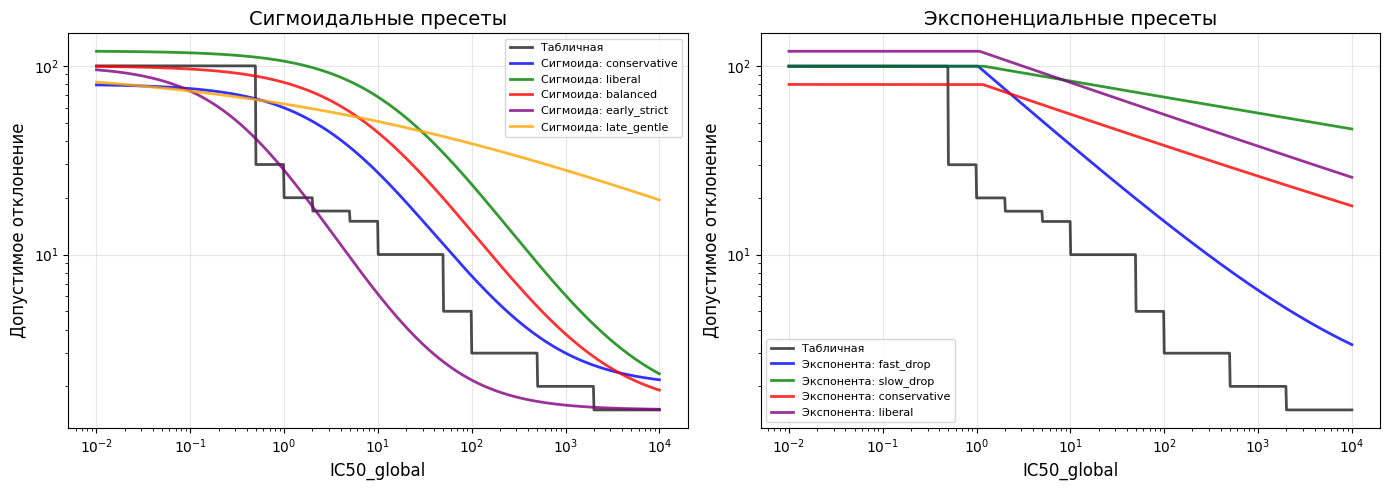

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import Tuple, Dict, List, Any, Optional

# -----------------------
# 1) ФУНКЦИИ ДОПУСТИМОГО ОТКЛОНЕНИЯ (УБЫВАЮЩИЕ!)
# -----------------------

# Старая табличная функция (убывающая по дизайну)
def calculate_allowed_fold_table(ic50_global: float) -> float:
    """Табличная шкала из исходного кода - убывающая"""
    table = [
        (0.0, 0.5, 100.0),
        (0.5, 1.0, 30.0),
        (1.0, 2.0, 20.0),
        (2.0, 5.0, 17.0),
        (5.0, 10.0, 15.0),
        (10.0, 50.0, 10.0),
        (50.0, 100.0, 5.0),
        (100.0, 500.0, 3.0),
        (500.0, 2000.0, 2.0),
        (2000.0, float("inf"), 1.5),
    ]
    for low, high, fold in table:
        if low <= ic50_global < high:
            return fold
    return 1.5

# Экспоненциальная функция - УБЫВАЮЩАЯ
def calculate_allowed_fold_exp(ic50_global: float, 
                              A: float = 100.0,     # Начальное значение (при малых IC50)
                              B: float = 0.4,      # Скорость убывания
                              C: float = 1.5) -> float:  # Конечное значение (при больших IC50)
    """Экспоненциальная убывающая функция: A * exp(-B * log10(x)) + C"""
    if ic50_global <= 0:
        return A
    
    log_x = np.log10(ic50_global)
    # Это уже убывающая функция, так как exp(-B * log_x) уменьшается с ростом x
    allowed_fold = A * np.exp(-B * log_x) + C
    # Ограничиваем между C (минимум) и A (максимум)
    allowed_fold = np.clip(allowed_fold, C, A)
    
    return float(allowed_fold)

# Сигмоидальная УБЫВАЮЩАЯ функция
def calculate_allowed_fold_sigmoid(ic50_global: float,
                                   U: float = 100.0,    # Верхнее значение (при малых IC50)
                                   L: float = 1.5,      # Нижнее значение (при больших IC50)
                                   x0_log: float = 0.0, # Точка перегиба (log10)
                                   k: float = 1.0,      # Крутизна (положительная для убывания)
                                   start_point: float = 0.5,  # Начало заметного снижения
                                   end_point: float = 100.0,  # Выход на нижнее плато
                                   use_thresholds: bool = False) -> float:
    """
    Убывающая сигмоидальная функция: 
    y = L + (U - L) / (1 + exp(k*(x - x0)))  # k>0 дает убывание
    
    Если use_thresholds=True, автоматически вычисляет x0 и k
    на основе start_point и end_point.
    """
    if ic50_global <= 0:
        return U
    
    log_x = np.log10(ic50_global)
    
    if use_thresholds:
        # Автоматическая настройка параметров на основе порогов
        log_start = np.log10(start_point)   # где начинается снижение
        log_end = np.log10(end_point)       # где достигается нижнее плато
        
        # Точка перегива посередине между порогами
        x0_log = (log_start + log_end) / 2
        
        # Крутизна обратно пропорциональна расстоянию между порогами
        # Большее расстояние = более плавный переход
        distance = log_end - log_start
        if distance > 0:
            k = 4.0 / distance  # Эмпирический коэффициент
        else:
            k = 1.0
    
    # УБЫВАЮЩАЯ сигмоида: чем больше x, тем меньше y
    # При k > 0: при x → -∞, exp(k*(x-x0)) → 0, y → U (верхнее значение)
    # При x → +∞, exp(k*(x-x0)) → +∞, y → L (нижнее значение)
    allowed_fold = L + (U - L) / (1 + np.exp(k * (log_x - x0_log)))
    
    # Ограничиваем диапазон
    allowed_fold = np.clip(allowed_fold, L, U)
    
    return float(allowed_fold)

# -----------------------
# 2) ВИЗУАЛИЗАЦИЯ С ИНТЕРАКТИВНЫМИ ЭЛЕМЕНТАМИ
# -----------------------

def create_interactive_comparison():
    """Создает интерактивное сравнение всех трех функций"""
    try:
        from ipywidgets import interact, FloatSlider, IntSlider, Checkbox, VBox, HBox, Label, ToggleButtons
        import ipywidgets as widgets
        
        # Стили для виджетов
        style = {'description_width': 'initial'}
        layout = {'width': '400px'}
        
        # Выбор типа функции для детальной настройки
        func_selector = ToggleButtons(
            options=['Экспонента', 'Сигмоида'],
            value='Экспонента',
            description='Настраиваемая функция:',
            style=style
        )
        
        # Параметры для экспоненциальной функции
        exp_A_slider = FloatSlider(
            value=100.0, min=10.0, max=200.0, step=10.0,
            description='A (макс. при малых IC50):',
            style=style, layout=layout
        )
        
        exp_B_slider = FloatSlider(
            value=0.4, min=0.1, max=2.0, step=0.1,
            description='B (скорость убывания):',
            style=style, layout=layout
        )
        
        exp_C_slider = FloatSlider(
            value=1.5, min=1.0, max=10.0, step=0.5,
            description='C (мин. при больших IC50):',
            style=style, layout=layout
        )
        
        # Параметры для сигмоиды
        sig_U_slider = FloatSlider(
            value=100.0, min=10.0, max=200.0, step=10.0,
            description='U (верхнее значение):',
            style=style, layout=layout
        )
        
        sig_L_slider = FloatSlider(
            value=1.5, min=1.0, max=10.0, step=0.5,
            description='L (нижнее значение):',
            style=style, layout=layout
        )
        
        sig_x0_slider = FloatSlider(
            value=0.0, min=-2.0, max=2.0, step=0.1,
            description='x₀ (точка перегиба в log₁₀):',
            style=style, layout=layout
        )
        
        sig_k_slider = FloatSlider(
            value=1.0, min=0.1, max=5.0, step=0.1,
            description='k (крутизна убывания):',
            style=style, layout=layout
        )
        
        # Пороги для автоматической настройки сигмоиды
        use_auto_checkbox = Checkbox(
            value=False,
            description='Автонастройка по порогам',
            style=style
        )
        
        start_slider = FloatSlider(
            value=0.5, min=0.1, max=10.0, step=0.1,
            description='Начало снижения:',
            style=style, layout=layout,
            disabled=True
        )
        
        end_slider = FloatSlider(
            value=100.0, min=10.0, max=1000.0, step=10.0,
            description='Выход на плато:',
            style=style, layout=layout,
            disabled=True
        )
        
        def update_slider_state(change):
            """Обновляет состояние слайдеров"""
            auto = change['new']
            start_slider.disabled = not auto
            end_slider.disabled = not auto
            sig_x0_slider.disabled = auto
            sig_k_slider.disabled = auto
        
        use_auto_checkbox.observe(update_slider_state, names='value')
        
        def update_visibility(change):
            """Показывает/скрывает слайдеры в зависимости от выбранной функции"""
            selected = change['new']
            if selected == 'Экспонента':
                exp_box.layout.display = 'flex'
                sig_box.layout.display = 'none'
            else:
                exp_box.layout.display = 'none'
                sig_box.layout.display = 'flex'
        
        func_selector.observe(update_visibility, names='value')
        
        # Функция для обновления графика
        def update_plot(selected_func, exp_A, exp_B, exp_C,
                       sig_U, sig_L, sig_x0, sig_k,
                       use_auto, start_thresh, end_thresh):
            
            fig, axes = plt.subplots(2, 2, figsize=(14, 10))
            
            # Генерируем данные
            x_vals = np.logspace(-2, 4, 1000)  # от 0.01 до 10000
            
            # Вычисляем значения для всех функций
            y_table = [calculate_allowed_fold_table(x) for x in x_vals]
            y_exp = [calculate_allowed_fold_exp(x, A=exp_A, B=exp_B, C=exp_C) for x in x_vals]
            
            if use_auto:
                y_sigmoid = [calculate_allowed_fold_sigmoid(
                    x, U=sig_U, L=sig_L, 
                    start_point=start_thresh, end_point=end_thresh,
                    use_thresholds=True
                ) for x in x_vals]
                sig_label = f'Сигмоида (авто: {start_thresh}→{end_thresh})'
            else:
                y_sigmoid = [calculate_allowed_fold_sigmoid(
                    x, U=sig_U, L=sig_L, x0_log=sig_x0, k=sig_k,
                    use_thresholds=False
                ) for x in x_vals]
                sig_label = f'Сигмоида (x₀=10^{sig_x0:.1f}, k={sig_k:.1f})'
            
            # График 1: Логарифмическая шкала
            ax1 = axes[0, 0]
            ax1.loglog(x_vals, y_table, 'r-', linewidth=2, label='Табличная')
            ax1.loglog(x_vals, y_exp, 'b-', linewidth=2, 
                      label=f'Экспонента (A={exp_A}, B={exp_B}, C={exp_C})')
            ax1.loglog(x_vals, y_sigmoid, 'g-', linewidth=2, label=sig_label)
            
            ax1.set_xlabel('IC50_global', fontsize=12)
            ax1.set_ylabel('Допустимое отклонение (кратное)', fontsize=12)
            ax1.set_title('Сравнение функций (логарифмическая шкала)', fontsize=14)
            ax1.grid(True, alpha=0.3)
            ax1.legend(loc='upper right', fontsize=9)
            
            # График 2: Линейная шкала (0-100)
            ax2 = axes[0, 1]
            x_vals_lin = np.linspace(0, 100, 1000)
            
            y_table_lin = [calculate_allowed_fold_table(x) for x in x_vals_lin]
            y_exp_lin = [calculate_allowed_fold_exp(x, A=exp_A, B=exp_B, C=exp_C) 
                        for x in x_vals_lin]
            
            if use_auto:
                y_sigmoid_lin = [calculate_allowed_fold_sigmoid(
                    x, U=sig_U, L=sig_L,
                    start_point=start_thresh, end_point=end_thresh,
                    use_thresholds=True
                ) for x in x_vals_lin]
            else:
                y_sigmoid_lin = [calculate_allowed_fold_sigmoid(
                    x, U=sig_U, L=sig_L, x0_log=sig_x0, k=sig_k,
                    use_thresholds=False
                ) for x in x_vals_lin]
            
            ax2.plot(x_vals_lin, y_table_lin, 'r-', linewidth=2, alpha=0.7, label='Табличная')
            ax2.plot(x_vals_lin, y_exp_lin, 'b-', linewidth=2, alpha=0.7, label='Экспонента')
            ax2.plot(x_vals_lin, y_sigmoid_lin, 'g-', linewidth=2, alpha=0.7, label='Сигмоида')
            
            # Отмечаем пороги
            if use_auto:
                ax2.axvline(x=start_thresh, color='orange', linestyle='--', 
                           alpha=0.5, label=f'Начало: {start_thresh}')
                ax2.axvline(x=end_thresh, color='purple', linestyle='--', 
                           alpha=0.5, label=f'Плато: {end_thresh}')
            
            ax2.set_xlabel('IC50_global', fontsize=12)
            ax2.set_ylabel('Допустимое отклонение (кратное)', fontsize=12)
            ax2.set_title('Сравнение функций (линейная шкала, 0-100)', fontsize=14)
            ax2.grid(True, alpha=0.3)
            ax2.legend(loc='upper right', fontsize=9)
            ax2.set_ylim(0, max(exp_A, sig_U) * 1.1)
            
            # График 3: Разница между функциями
            ax3 = axes[1, 0]
            diff_sig_table = np.array(y_sigmoid) - np.array(y_table)
            diff_exp_table = np.array(y_exp) - np.array(y_table)
            
            ax3.semilogx(x_vals, diff_sig_table, 'g-', linewidth=2, label='Сигмоида - Табличная')
            ax3.semilogx(x_vals, diff_exp_table, 'b-', linewidth=2, label='Экспонента - Табличная')
            ax3.axhline(y=0, color='r', linestyle='--', alpha=0.5)
            
            ax3.set_xlabel('IC50_global', fontsize=12)
            ax3.set_ylabel('Разница (кратное)', fontsize=12)
            ax3.set_title('Разница относительно табличной функции', fontsize=14)
            ax3.grid(True, alpha=0.3)
            ax3.legend(fontsize=9)
            
            # График 4: Ключевые контрольные точки
            ax4 = axes[1, 1]
            key_points = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2000]
            
            table_vals = [calculate_allowed_fold_table(x) for x in key_points]
            exp_vals = [calculate_allowed_fold_exp(x, A=exp_A, B=exp_B, C=exp_C) for x in key_points]
            sig_vals = [calculate_allowed_fold_sigmoid(
                x, U=sig_U, L=sig_L, x0_log=sig_x0, k=sig_k,
                use_thresholds=use_auto, start_point=start_thresh, end_point=end_thresh
            ) for x in key_points]
            
            x_pos = np.arange(len(key_points))
            width = 0.25
            
            ax4.bar(x_pos - width, table_vals, width, label='Табличная', color='red', alpha=0.7)
            ax4.bar(x_pos, exp_vals, width, label='Экспонента', color='blue', alpha=0.7)
            ax4.bar(x_pos + width, sig_vals, width, label='Сигмоида', color='green', alpha=0.7)
            
            ax4.set_xlabel('IC50_global', fontsize=12)
            ax4.set_ylabel('Допустимое отклонение', fontsize=12)
            ax4.set_title('Значения в ключевых точках', fontsize=14)
            ax4.set_xticks(x_pos)
            ax4.set_xticklabels([str(x) for x in key_points], rotation=45)
            ax4.legend(fontsize=9)
            ax4.grid(True, alpha=0.3, axis='y')
            
            plt.tight_layout()
            plt.show()
        
        # Создаем интерфейс
        exp_box = VBox([exp_A_slider, exp_B_slider, exp_C_slider])
        sig_box = VBox([use_auto_checkbox, 
                       HBox([sig_U_slider, sig_L_slider]),
                       HBox([sig_x0_slider, sig_k_slider]),
                       HBox([start_slider, end_slider])])
        
        # Изначально показываем только экспоненту
        sig_box.layout.display = 'none'
        
        controls_box = VBox([func_selector, exp_box, sig_box])
        
        ui = HBox([controls_box])
        
        # Создаем интерактивный виджет
        out = widgets.interactive_output(
            update_plot,
            {
                'selected_func': func_selector,
                'exp_A': exp_A_slider,
                'exp_B': exp_B_slider,
                'exp_C': exp_C_slider,
                'sig_U': sig_U_slider,
                'sig_L': sig_L_slider,
                'sig_x0': sig_x0_slider,
                'sig_k': sig_k_slider,
                'use_auto': use_auto_checkbox,
                'start_thresh': start_slider,
                'end_thresh': end_slider
            }
        )
        
        display(ui, out)
        
    except ImportError:
        print("ipywidgets не установлен. Используйте статическую визуализацию.")
        create_static_comparison()

def create_static_comparison():
    """Статическое сравнение убывающих функций"""
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))
    
    x_vals = np.logspace(-2, 4, 1000)
    
    # Пример 1: Все три функции (стандартные параметры)
    ax1 = axes[0, 0]
    y_table = [calculate_allowed_fold_table(x) for x in x_vals]
    y_exp = [calculate_allowed_fold_exp(x) for x in x_vals]
    y_sig = [calculate_allowed_fold_sigmoid(x) for x in x_vals]
    
    ax1.loglog(x_vals, y_table, 'r-', linewidth=2, label='Табличная')
    ax1.loglog(x_vals, y_exp, 'b-', linewidth=2, label='Экспонента (A=100, B=0.4, C=1.5)')
    ax1.loglog(x_vals, y_sig, 'g-', linewidth=2, label='Сигмоида (U=100, L=1.5, x₀=0, k=1)')
    ax1.set_title('Стандартные параметры', fontsize=12)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8)
    
    # Пример 2: Разные крутизны сигмоиды
    ax2 = axes[0, 1]
    y_sig_steep = [calculate_allowed_fold_sigmoid(x, k=3.0) for x in x_vals]
    y_sig_smooth = [calculate_allowed_fold_sigmoid(x, k=0.3) for x in x_vals]
    
    ax2.loglog(x_vals, y_table, 'r-', linewidth=1, alpha=0.5, label='Табличная')
    ax2.loglog(x_vals, y_sig_steep, 'g-', linewidth=2, label='Крутая (k=3.0)')
    ax2.loglog(x_vals, y_sig_smooth, 'g--', linewidth=2, label='Плавная (k=0.3)')
    ax2.set_title('Влияние крутизны сигмоиды', fontsize=12)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8)
    
    # Пример 3: Разные точки перегиба
    ax3 = axes[0, 2]
    y_sig_early = [calculate_allowed_fold_sigmoid(x, x0_log=-1.0) for x in x_vals]  # Раннее снижение
    y_sig_late = [calculate_allowed_fold_sigmoid(x, x0_log=1.0) for x in x_vals]    # Позднее снижение
    
    ax3.loglog(x_vals, y_table, 'r-', linewidth=1, alpha=0.5, label='Табличная')
    ax3.loglog(x_vals, y_sig_early, 'g-', linewidth=2, label='Раннее (x₀=10⁻¹≈0.1)')
    ax3.loglog(x_vals, y_sig_late, 'g--', linewidth=2, label='Позднее (x₀=10¹=10)')
    ax3.set_title('Влияние точки перегиба', fontsize=12)
    ax3.grid(True, alpha=0.3)
    ax3.legend(fontsize=8)
    
    # Пример 4: Автоматическая настройка по разным порогам
    ax4 = axes[1, 0]
    y_sig_wide = [calculate_allowed_fold_sigmoid(x, start_point=0.1, end_point=1000.0, use_thresholds=True) for x in x_vals]
    y_sig_narrow = [calculate_allowed_fold_sigmoid(x, start_point=1.0, end_point=100.0, use_thresholds=True) for x in x_vals]
    
    ax4.loglog(x_vals, y_table, 'r-', linewidth=1, alpha=0.5, label='Табличная')
    ax4.loglog(x_vals, y_sig_wide, 'g-', linewidth=2, label='Широкий (0.1→1000)')
    ax4.loglog(x_vals, y_sig_narrow, 'g--', linewidth=2, label='Узкий (1→100)')
    ax4.set_title('Автонастройка: разные диапазоны', fontsize=12)
    ax4.grid(True, alpha=0.3)
    ax4.legend(fontsize=8)
    
    # Пример 5: Влияние параметров экспоненты
    ax5 = axes[1, 1]
    y_exp_fast = [calculate_allowed_fold_exp(x, B=1.0) for x in x_vals]    # Быстрое убывание
    y_exp_slow = [calculate_allowed_fold_exp(x, B=0.2) for x in x_vals]    # Медленное убывание
    
    ax5.loglog(x_vals, y_table, 'r-', linewidth=1, alpha=0.5, label='Табличная')
    ax5.loglog(x_vals, y_exp_fast, 'b-', linewidth=2, label='Быстрая (B=1.0)')
    ax5.loglog(x_vals, y_exp_slow, 'b--', linewidth=2, label='Медленная (B=0.2)')
    ax5.set_title('Влияние скорости убывания (экспонента)', fontsize=12)
    ax5.grid(True, alpha=0.3)
    ax5.legend(fontsize=8)
    
    # Пример 6: Сравнение в линейной шкале
    ax6 = axes[1, 2]
    x_vals_lin = np.linspace(0, 100, 1000)
    y_table_lin = [calculate_allowed_fold_table(x) for x in x_vals_lin]
    y_exp_lin = [calculate_allowed_fold_exp(x) for x in x_vals_lin]
    y_sig_lin = [calculate_allowed_fold_sigmoid(x, start_point=0.5, end_point=100.0, use_thresholds=True) for x in x_vals_lin]
    
    ax6.plot(x_vals_lin, y_table_lin, 'r-', linewidth=2, label='Табличная')
    ax6.plot(x_vals_lin, y_exp_lin, 'b-', linewidth=2, label='Экспонента')
    ax6.plot(x_vals_lin, y_sig_lin, 'g-', linewidth=2, label='Сигмоида (0.5→100)')
    ax6.set_title('Сравнение в линейной шкале (0-100)', fontsize=12)
    ax6.grid(True, alpha=0.3)
    ax6.legend(fontsize=8)
    ax6.set_xlabel('IC50_global')
    ax6.set_ylabel('Допустимое отклонение')
    
    plt.tight_layout()
    plt.show()

# -----------------------
# 3) ТЕСТИРОВАНИЕ ФУНКЦИЙ
# -----------------------

def test_functions():
    """Тестирует, что все функции убывающие"""
    print("Тестирование убывающих функций:")
    print("-" * 50)
    
    test_points = [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 2000]
    
    print("IC50\tТабличная\tЭкспонента\tСигмоида\tСтатус")
    print("-" * 60)
    
    prev_table = float('inf')
    prev_exp = float('inf')
    prev_sig = float('inf')
    
    all_decreasing = True
    
    for x in test_points:
        table_val = calculate_allowed_fold_table(x)
        exp_val = calculate_allowed_fold_exp(x)
        sig_val = calculate_allowed_fold_sigmoid(x, start_point=0.5, end_point=100.0, use_thresholds=True)
        
        # Проверяем убывание
        table_decreasing = table_val <= prev_table or abs(table_val - prev_table) < 0.1
        exp_decreasing = exp_val <= prev_exp or abs(exp_val - prev_exp) < 0.1
        sig_decreasing = sig_val <= prev_sig or abs(sig_val - prev_sig) < 0.1
        
        status = "✓" if (table_decreasing and exp_decreasing and sig_decreasing) else "✗"
        
        if not (table_decreasing and exp_decreasing and sig_decreasing):
            all_decreasing = False
        
        print(f"{x}\t{table_val:.2f}\t\t{exp_val:.2f}\t\t{sig_val:.2f}\t\t{status}")
        
        prev_table = table_val
        prev_exp = exp_val
        prev_sig = sig_val
    
    print("-" * 60)
    if all_decreasing:
        print("✅ Все функции убывающие!")
    else:
        print("❌ Некоторые функции не убывающие!")
    
    return all_decreasing

# -----------------------
# 4) ПРЕСЕТЫ ДЛЯ БЫСТРОГО ИСПОЛЬЗОВАНИЯ
# -----------------------

# Пресеты сигмоидальной функции
SIGMOID_PRESETS = {
    'conservative': {  # Консервативная (строгая) фильтрация
        'U': 80.0, 'L': 2.0, 'start_point': 0.3, 'end_point': 50.0, 'use_thresholds': True
    },
    'liberal': {  # Либеральная (мягкая) фильтрация
        'U': 120.0, 'L': 1.5, 'start_point': 1.0, 'end_point': 200.0, 'use_thresholds': True
    },
    'balanced': {  # Сбалансированная
        'U': 100.0, 'L': 1.5, 'start_point': 0.5, 'end_point': 100.0, 'use_thresholds': True
    },
    'early_strict': {  # Раннее строгое снижение
        'U': 100.0, 'L': 1.5, 'x0_log': -0.5, 'k': 2.0, 'use_thresholds': False
    },
    'late_gentle': {  # Позднее мягкое снижение
        'U': 100.0, 'L': 1.5, 'x0_log': 1.0, 'k': 0.5, 'use_thresholds': False
    }
}

# Пресеты экспоненциальной функции
EXP_PRESETS = {
    'fast_drop': {'A': 100.0, 'B': 1.0, 'C': 1.5},  # Быстрое убывание
    'slow_drop': {'A': 100.0, 'B': 0.2, 'C': 1.5},  # Медленное убывание
    'conservative': {'A': 80.0, 'B': 0.4, 'C': 2.0},  # Консервативная
    'liberal': {'A': 120.0, 'B': 0.4, 'C': 1.5},  # Либеральная
}

def create_comparison_with_presets():
    """Создает сравнение с использованием пресетов"""
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    x_vals = np.logspace(-2, 4, 1000)
    
    # Всегда показываем табличную функцию
    y_table = [calculate_allowed_fold_table(x) for x in x_vals]
    
    # График 1: Сигмоидальные пресеты
    ax1 = axes[0]
    ax1.loglog(x_vals, y_table, 'k-', linewidth=2, label='Табличная', alpha=0.7)
    
    colors = ['blue', 'green', 'red', 'purple', 'orange']
    for (name, params), color in zip(SIGMOID_PRESETS.items(), colors):
        y_sig = [calculate_allowed_fold_sigmoid(x, **params) for x in x_vals]
        ax1.loglog(x_vals, y_sig, color=color, linewidth=2, alpha=0.8, label=f'Сигмоида: {name}')
    
    ax1.set_xlabel('IC50_global', fontsize=12)
    ax1.set_ylabel('Допустимое отклонение', fontsize=12)
    ax1.set_title('Сигмоидальные пресеты', fontsize=14)
    ax1.grid(True, alpha=0.3)
    ax1.legend(fontsize=8)
    
    # График 2: Экспоненциальные пресеты
    ax2 = axes[1]
    ax2.loglog(x_vals, y_table, 'k-', linewidth=2, label='Табличная', alpha=0.7)
    
    for (name, params), color in zip(EXP_PRESETS.items(), colors):
        y_exp = [calculate_allowed_fold_exp(x, **params) for x in x_vals]
        ax2.loglog(x_vals, y_exp, color=color, linewidth=2, alpha=0.8, label=f'Экспонента: {name}')
    
    ax2.set_xlabel('IC50_global', fontsize=12)
    ax2.set_ylabel('Допустимое отклонение', fontsize=12)
    ax2.set_title('Экспоненциальные пресеты', fontsize=14)
    ax2.grid(True, alpha=0.3)
    ax2.legend(fontsize=8)
    
    plt.tight_layout()
    plt.show()

# -----------------------
# 5) ЗАПУСК
# -----------------------

if __name__ == "__main__":
    print("=" * 60)
    print("СРАВНЕНИЕ УБЫВАЮЩИХ ФУНКЦИЙ ДОПУСТИМОГО ОТКЛОНЕНИЯ")
    print("=" * 60)
    
    # Тестируем функции
    test_functions()
    
    print("\n" + "=" * 60)
    print("ВИЗУАЛИЗАЦИЯ СРАВНЕНИЯ")
    print("=" * 60)
    
    # Интерактивное сравнение
    try:
        create_interactive_comparison()
    except:
        print("Для интерактивного сравнения требуется Jupyter Notebook с ipywidgets")
        create_static_comparison()
    
    # Сравнение пресетов
    print("\n" + "=" * 60)
    print("СРАВНЕНИЕ ПРЕСЕТОВ")
    print("=" * 60)
    create_comparison_with_presets()

Визуализация влияния параметров сигмоиды...
График сохранен в ./sigmoid_parameters.png


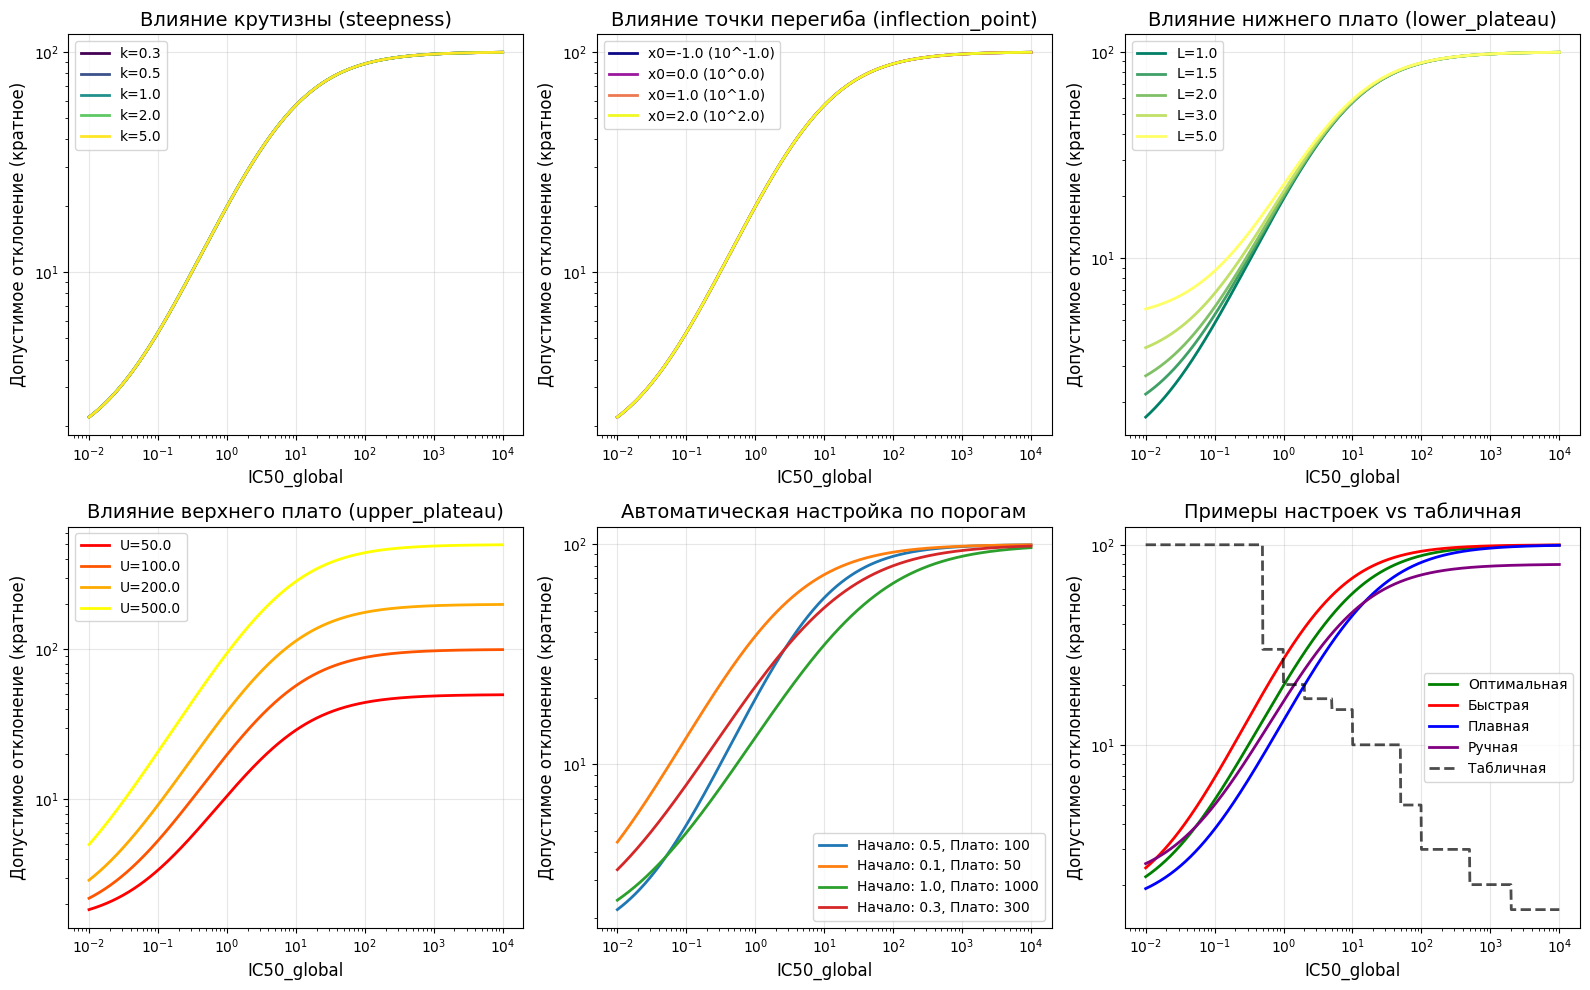


Сравнение разных сигмоид:
IC50	Быстрая	Плавная	Авто	Табличная
0.1	4.7	3.8	5.3	100.0
0.5	13.2	7.8	13.2	30.0
1.0	21.0	11.3	19.8	20.0
5.0	50.8	26.4	44.3	15.0
10.0	65.1	35.9	57.2	10.0
50.0	88.3	58.3	81.7	5.0
100.0	93.2	65.5	88.3	3.0
500.0	98.2	75.1	96.2	2.0
1000.0	99.0	77.0	97.7	2.0


In [34]:
# Пример использования
if __name__ == "__main__":
    # 1. Визуализация параметров
    print("Визуализация влияния параметров сигмоиды...")
    fig = visualize_sigmoid_parameters('./sigmoid_parameters.png')
    plt.show()
    
    # 2. Примеры разных настроек
    
    # Вариант 1: Быстрое снижение (крутая сигмоида)
    def sigmoid_fast(x):
        return calculate_allowed_fold_sigmoid_param(
            x, 
            lower_plateau=1.5,
            upper_plateau=100.0,
            inflection_point=0.0,  # Перегиб при IC50=1
            steepness=2.0,         # Крутой переход
            start_threshold=0.5,
            plateau_threshold=50.0
        )
    
    # Вариант 2: Плавное снижение
    def sigmoid_smooth(x):
        return calculate_allowed_fold_sigmoid_param(
            x,
            lower_plateau=2.0,
            upper_plateau=80.0,
            inflection_point=1.0,   # Перегиб при IC50=10
            steepness=0.7,          # Плавный переход
            start_threshold=1.0,
            plateau_threshold=200.0
        )
    
    # Вариант 3: Автоматическая настройка по порогам (ваш вариант)
    def sigmoid_auto(x):
        return calculate_allowed_fold_sigmoid_param(
            x,
            start_threshold=0.5,    # Начинаем снижение при 0.5
            plateau_threshold=100.0 # Выходим на плато при 100
        )
    
    # Тестируем
    test_values = [0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0, 500.0, 1000.0]
    
    print("\nСравнение разных сигмоид:")
    print("IC50\tБыстрая\tПлавная\tАвто\tТабличная")
    for val in test_values:
        fast = sigmoid_fast(val)
        smooth = sigmoid_smooth(val)
        auto = sigmoid_auto(val)
        
        # Старая табличная
        table_val = 0
        if val < 0.5: table_val = 100.0
        elif val < 1.0: table_val = 30.0
        elif val < 2.0: table_val = 20.0
        elif val < 5.0: table_val = 17.0
        elif val < 10.0: table_val = 15.0
        elif val < 50.0: table_val = 10.0
        elif val < 100.0: table_val = 5.0
        elif val < 500.0: table_val = 3.0
        elif val < 2000.0: table_val = 2.0
        else: table_val = 1.5
        
        print(f"{val}\t{fast:.1f}\t{smooth:.1f}\t{auto:.1f}\t{table_val}")